In [1]:
import pandas as pd
import numpy as np
import os

from bs4 import BeautifulSoup
import pandas as pd

import time
from requests import Session
import sys 
import re
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression
from bertopic.backend import WordDocEmbedder

import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import WordEmbeddingSimilarityIndex

from re import sub
from multiprocessing import cpu_count

from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

from xgboost import XGBClassifier
import argparse
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity

from autocorrect import Speller
import tldextract

from itertools import combinations
from nltk import skipgrams
import umap

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib as mpl
from pylab import rcParams
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_theme(style='white')
#% matplotlib inline
from datetime import datetime

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
#from bertopic.vectorizers import ClassTfidfTransformer

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')

import spacy
nlp = spacy.load('en_core_web_sm')

from gensim.models import word2vec
import pickle
import gzip
import argparse
import torch
from transformers import BertTokenizer, BertModel
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech

import dgl

import string
import gensim
import collections
from gensim.corpora import Dictionary
import difflib 
from matplotlib_venn import venn3
from venn import venn
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from bertopic import BERTopic
import openai
#from bertopic.representation import OpenAI
from sentence_transformers import SentenceTransformer
import hdbscan

from autocorrect import Speller
from itertools import combinations
from nltk import skipgrams

from bs4 import BeautifulSoup
import requests
import csv
import time

import itertools
import collections
import re
import logging
from re import sub

# Import and download stopwords from NLTK.
nltk.download('stopwords')  # Download stopwords list.
stopwords = set(nltk.corpus.stopwords.words("english"))

import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from itertools import chain

import string
import gc
import warnings
warnings.filterwarnings('ignore')

import logging

# Initialize logging.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)  # DEBUG # INFO

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df1 = pd.read_csv('data/scopus_data.csv')
df1 = df1.drop(columns=['Source'])
df1

Authors  \
0    Plaza-del-Arco F.M., Molina-González M.D., Ure...   
1    Kwarteng J., Perfumi S.C., Farrell T., Third A...   
2                              Nguyen H., Gokhale S.S.   
3                       Albadi N., Kurdi M., Mishra S.   
4    Chakravarthi B.R., Hande A., Ponnusamy R., Kum...   
..                                                 ...   
301                                       Haslanger S.   
302                                  Harper S., Yar M.   
303                                Stanley L., Wise S.   
304                                  Harper S., Yar M.   
305                               Swami V., Voracek M.   

                                          Author(s) ID  \
0      57191078469;57204699220;8865743500;35088446700;   
1    57787586800;57191057092;57195714261;5795994540...   
2                              57212566405;7102468162;   
3                  57204813117;57204813334;7402725656;   
4    57201188126;57223674463;57224852716;5722485052...   
..                                                 ...   
301                                       16440003700;   
302                            56451468500;6602834234;   
303                             7006861440;7202622522;   
304                            56451468500;6602834234;   
305                            10639213000;7003718328;   

                                                 Title  Year  \
0    Integrating implicit and explicit linguistic p...  2022   
1    Misogynoir: challenges in detecting intersecti...  2022   
2    Analyzing extremist social media content: a ca...  2022   
3    Deradicalizing YouTube: Characterization, Dete...  2022   
4    How can we detect Homophobia and Transphobia? ...  2022   
..                                                 ...   ...   
301  Resisting Reality: Social Construction and Soc...  2013   
302  Loving violence? The ambiguities of SM imagery...  2013   
303  Method, methodology and epistemology in femini...  2013   
304  Loving violence?: The ambiguities of SM imager...  2013   
305  Associations among men's sexist attitudes, obj...  2013   

                                          Source title Volume  Issue Art. No.  \
0                              Knowledge-Based Systems    258    NaN   109965   
1                   Social Network Analysis and Mining     12      1      166   
2                   Social Network Analysis and Mining     12      1      115   
3    Proceedings of the ACM on Human-Computer Inter...      6  CSCW2      505   
4    International Journal of Information Managemen...      2      2   100119   
..                                                 ...    ...    ...      ...   
301  Resisting Reality: Social Construction and Soc...    NaN    NaN      NaN   
302  Violence and War in Culture and the Media: Fiv...    NaN    NaN      NaN   
303  Feminist Praxis (RLE Feminist Theory): Researc...    NaN    NaN      NaN   
304  Violence and War in Culture and the Media: Fiv...    NaN    NaN      NaN   
305                  Psychology of Men and Masculinity     14      2      NaN   

    Page start Page end  ...                                Publisher  \
0          NaN      NaN  ...                            Elsevier B.V.   
1          NaN      NaN  ...                                 Springer   
2          NaN      NaN  ...                                 Springer   
3          NaN      NaN  ...      Association for Computing Machinery   
4          NaN      NaN  ...                            Elsevier B.V.   
..         ...      ...  ...                                      ...   
301          1      464  ...                  Oxford University Press   
302         92      109  ...                       Taylor and Francis   
303         20       60  ...                       Taylor and Francis   
304         92      110  ...                       Taylor and Francis   
305        168      174  ...  American Psychological Association Inc.   

     Conference name Conference da

In [3]:
df1.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Funding Details', 'References',
       'Sponsors', 'Publisher', 'Conference name', 'Conference date',
       'Conference location', 'Conference code',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access'],
      dtype='object')

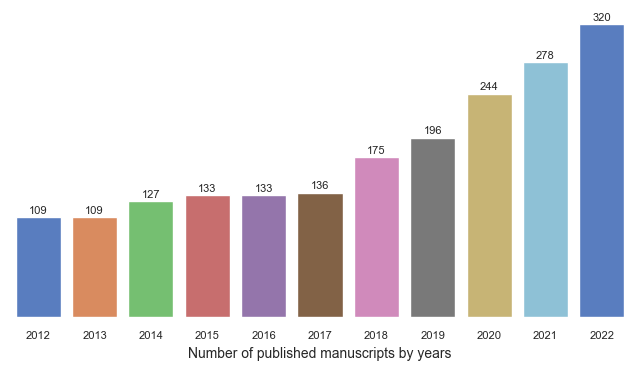

In [30]:
df_pub_years = pd.DataFrame({
    'year': df1['Year'].unique(),
    'count': df1['Year'].value_counts().tolist()
})
df_pub_years = df_pub_years.sort_values(by='year', ascending=True)
tick_val = df_pub_years.year.to_list()

f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="year", y="count", data=df_pub_years,
            label="count", palette=palette)
#ax.set(ylim=(0, 260))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Number of published manuscripts by years", fontsize=10)
p.set_ylabel("",fontsize=10)
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
p.tick_params(labelsize=8)

In [31]:
df1['Language of Original Document'].unique()

array(['English', 'Chinese', 'Portuguese', 'Spanish', 'Hungarian',
       'Russian', 'German', 'Italian', 'French', 'Romanian', 'Swedish',
       'Persian', 'Korean'], dtype=object)

In [32]:
df1['Open Access'].unique() 

array(['All Open Access; Gold Open Access; Green Open Access', nan,
       'All Open Access; Green Open Access',
       'All Open Access; Hybrid Gold Open Access',
       'All Open Access; Green Open Access; Hybrid Gold Open Access',
       'All Open Access; Gold Open Access',
       'All Open Access; Bronze Open Access; Green Open Access',
       'All Open Access; Bronze Open Access'], dtype=object)

In [33]:
df1['Publisher'].unique()

array(['BioMed Central Ltd', 'Frontiers Media S.A.',
       'Edizioni Minerva Medica', 'Oxford University Press',
       'SAGE Publications Inc.', 'Public Library of Science',
       'Elsevier Ltd', 'Springer', 'John Wiley and Sons Inc',
       'Springer Science and Business Media Deutschland GmbH',
       'Springer Nature', 'American Physical Society',
       'Association for Computing Machinery, Inc', 'NLM (Medline)',
       'Association for Research in Vision and Ophthalmology Inc.',
       'Elsevier Inc.', 'MDPI', 'Shiraz University of Medical Sciences',
       'Academy of Management', 'JMIR Publications Inc.',
       'Akademiai Kiado ZRt.', 'Elsevier B.V.', 'Academic Press',
       'Wolters Kluwer Medknow Publications',
       'Singapore Medical Association',
       'Sage Publications India Pvt. Ltd', 'Richtmann Publishing Ltd',
       'Science Press', 'W.B. Saunders', 'John Wiley and Sons Ltd',
       'Elsevier Masson s.r.l.',
       'College of Physicians and Surgeons Pakistan',

In [34]:
df1['Document Type'].unique()

array(['Article', 'Review', 'Conference paper', 'Note', 'Book chapter',
       'Conference review', 'Letter', 'Book', 'Erratum', 'Editorial',
       'Short survey'], dtype=object)

In [35]:
df1['Cited by'].unique()

array([  0,   2,   1,   4,   3,  10,   6,   5,   9,   8,   7,  11,  29,
        14,  15,  19,  12,  25,  17,  18,  32,  16,  27,  13,  28,  24,
        23, 755,  22, 489,  43,  48,  26,  96,  44, 114,  33,  20, 265,
       108,  88,  68,  59,  37,  21,  35,  34,  54, 289, 106,  38,  39,
        82,  36,  55,  66,  75,  40,  50,  49,  31,  46, 210,  74,  52,
        56,  30,  45,  58, 105,  53,  41,  80, 107, 165,  67, 131, 206,
        60, 126, 464,  72,  47, 372, 100,  61,  57,  64, 125,  95, 133,
        51,  42,  84,  71,  73,  90, 166, 163, 264, 160,  65, 256,  69,
        83,  81, 431, 174,  93,  99, 147,  92, 116, 103, 159,  78,  87,
       135, 167,  70, 170,  62,  85, 807, 293, 123, 102, 143, 786, 128,
       384,  89, 392,  77, 771, 185, 162,  63])

In [36]:
df1['Document Type'].unique()

array(['Article', 'Review', 'Conference paper', 'Note', 'Book chapter',
       'Conference review', 'Letter', 'Book', 'Erratum', 'Editorial',
       'Short survey'], dtype=object)

Only take the data which falls under these document types:
- 'Article'
- 'Conference paper'
- 'Book'
- 'Book chapter'

In [37]:
df_sour = df1[(df1['Document Type'] == 'Article') | (df1['Document Type'] == 'Conference paper') | (df1['Document Type'] == 'Book') | (df1['Document Type'] == 'Book chapter')]
df_sour

Authors  \
0     Abhari R.E.; Thomson B.; Yang L.; Millwood I.;...   
1     Zhang X.; Yang D.; Wei Z.; Yan R.; Zhang Z.; H...   
3     Wu P.-H.; Glerup R.I.; Svensson M.H.S.; Erikss...   
4              Chavez K.; Weisshaar K.; Cabello-Hutt T.   
5     Liu S.; Xia D.; Wang Y.; Xu H.; Xu L.; Yuan D....   
...                                                 ...   
1955  Rentschler G.; Covolo L.; Ahmadi Haddad A.; Lu...   
1956  Costa F.W.G.; Fontenele E.H.L.; Bezerra T.P.; ...   
1957                                 Arai K.; Andrie R.   
1958  London B.; Downey G.; Romero-Canyas R.; Rattan...   
1959  Lyngbæk S.; Marott J.L.; Sehestedt T.; Hansen ...   

                                      Author full names  \
0     Abhari, Roxanna E. (57192540047); Thomson, Bla...   
1     Zhang, Xin (57212044541); Yang, Dejun (5644737...   
3     Wu, Ping-Hsun (57214630777); Glerup, Rie Io (5...   
4     Chavez, Koji (57200543245); Weisshaar, Katheri...   
5     Liu, Shangbin (57225134615); Xia, Danni (57413...   
...                                                 ...   
1955  Rentschler, Gerda (37102665600); Covolo, Lored...   
1956  Costa, Fábio Wildson Gurgel (55323295200); Fon...   
1957  Arai, Kohei (7403965268); Andrie, Rosa (572027...   
1958  London, Bonita (7006871212); Downey, Geraldine...   
1959  Lyngbæk, Stig (12783740200); Marott, Jacob L. ...   

                                           Author(s) ID  \
0     57192540047; 57194423183; 35122197600; 5720486...   
1     57212044541; 56447379000; 35216765200; 7103172...   
3     57214630777; 57211096652; 7102216120; 15072587...   
4                 57200543245; 56378689300; 57196484696   
5     57225134615; 57413486300; 57957147300; 5535995...   
...                                                 ...   
1955  37102665600; 7801513182; 54941231000; 70050660...   
1956  55323295200; 55994384000; 24544464200; 2492195...   
1957                            7403965268; 57202784694   
1958  7006871212; 57206567533; 35389569100; 36182144...   
1959  12783740200; 23473900300; 14046012600; 3527487...   

                                                 Titles  Year  \
0     External validation of models for predicting r...  2022   
1     Establishment of a nomogram for predicting lym...  2022   
3     Osteoprotegerin predicts cardiovascular events...  2022   
4     Gender and Racial Discrimination in Hiring Bef...  2022   
5     Predicting the risk of HIV infection among int...  2022   
...                                                 ...   ...   
1955  ATP13A2 (PARK9) polymorphisms influence the ne...  2012   
1956  Correlation between radiographic signs of thir...  2013   
1957  Gender classification with human gait based on...  2013   
1958  Gender-based rejection sensitivity and academi...  2012   
1959  Cardiovascular risk prediction in the general ...  2013   

                                           Source title Volume Issue Art. No.  \
0                                          BMC Medicine     20     1      302   
1                                 Frontiers in Oncology     12   NaN   898640   
3                   Nephrology Dialysis Transplantation     37     6      NaN   
4                                  Work and Occupations     49     3      NaN   
5                            Frontiers in Public Health     10   NaN  1015699   
...                                                 ...    ...   ...      ...   
1955                                    NeuroToxicology     33     4      NaN   
1956                          Acta Cirurgica Brasileira     28     3      NaN   
1957  Proceedings of the 2013 10th International Con...    NaN   NaN  6614297   
1958       Journal of Personality and Social Psychology    102     5      NaN   
1959                International Journal of Cardiology    167     6      NaN   

     Page start  ...                                    Conference name  \
0           NaN  ...                                                NaN   
1           NaN  

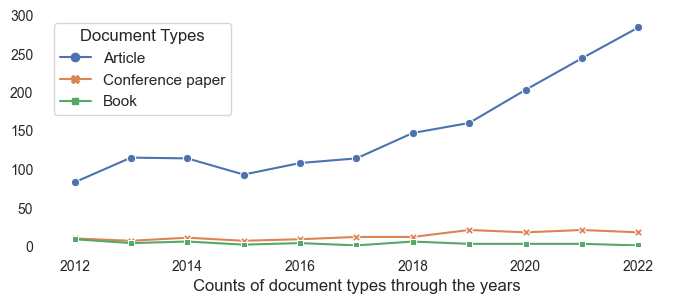

In [38]:
df_sour_only_yrs = df_sour[['Year', 'Document Type']]
df_sour_only_yrs['Document Type'] = df_sour_only_yrs['Document Type'].replace({'Book chapter': 'Book'})
# As a chapter is still part of a book
df_sour_only_yrs = df_sour_only_yrs.groupby(['Year'])['Document Type'].value_counts().reset_index(name='total')

f, ax = plt.subplots(figsize=(8, 3))
palette = sns.color_palette("muted")
p = sns.lineplot(
    data=df_sour_only_yrs,
    x="Year", y="total", hue="Document Type", style="Document Type",
    markers=True, dashes=False
)
#p.set(yticklabels=[])
ax.set(ylim=(0, 300))
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of document types through the years", fontsize=12)
p.set_ylabel("",fontsize=8)
plt.legend(title='Document Types', loc='upper left')
p.tick_params(labelsize=10)

<AxesSubplot:xlabel='Year'>

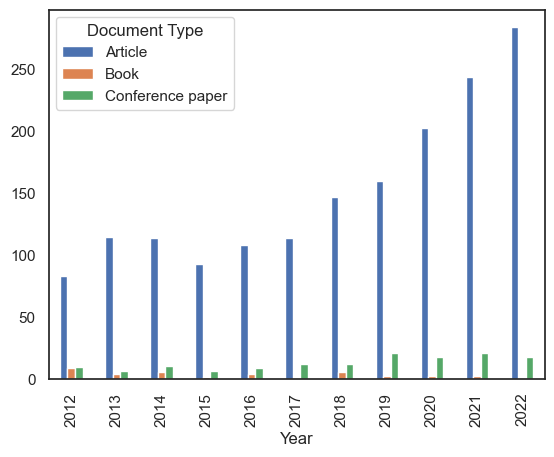

In [39]:
df_sour_only_yrs = df_sour[['Year', 'Document Type']]
df_sour_only_yrs['Document Type'] = df_sour_only_yrs['Document Type'].replace({'Book chapter': 'Book'})
df_sour_only_yrs = df_sour_only_yrs.groupby(['Year','Document Type']).size().reset_index().rename(columns={0:'count'})
df_sour_only_yrs= df_sour_only_yrs.sort_values(['Year', 'count'],axis=0,ascending=False)

df_sour_only_yrs.pivot(index=["Year"], columns='Document Type', values='count').plot(kind='bar')


In [40]:
df1['Open Access'].value_counts()

All Open Access; Gold Open Access; Green Open Access           503
All Open Access; Green Open Access                             245
All Open Access; Green Open Access; Hybrid Gold Open Access     86
All Open Access; Bronze Open Access; Green Open Access          76
All Open Access; Bronze Open Access                             74
All Open Access; Gold Open Access                               42
All Open Access; Hybrid Gold Open Access                        30
Name: Open Access, dtype: int64

## Data by the disciplines
Many of the results from the above data have been from different discipline. So to narrow down the search, the subject areas are specified, and the data is imported from a separate data file.

An additional step is done here because of that since the Scopus data does not export the discipline category. The data for each disciplines are collected separately and a column with the discipline is added alongside.

In [3]:
df_soc = pd.read_csv('data/scopus_social_science.csv')
df_soc['Discipline'] = 'Social Science'

df_cs = pd.read_csv('data/scopus_cs.csv')
df_cs['Discipline'] = 'Computer Science'

df_psy = pd.read_csv('data/scopus_psychology.csv')
df_psy['Discipline'] = 'Psychology'

df_engg = pd.read_csv('data/scopus_engg.csv')
df_engg['Discipline'] = 'Engineering'

df_mul = pd.read_csv('data/scopus_multidisc.csv')
df_mul['Discipline'] = 'Multidisciplinary'

df_ah = pd.read_csv('data/scopus_ah.csv')
df_ah['Discipline'] = 'Arts & Humanities'

df_ds = pd.read_csv('data/scopus_ds.csv')
df_ds['Discipline'] = 'Decision Sciences'

Now concatinate the dataframes lengthwise.

In [4]:
df2 = pd.concat([df_cs, df_soc, df_engg, df_psy, df_mul, df_ah, df_ds])
df2['index'] = df2.index
df2

Authors  \
0   Plaza-del-Arco F.M., Molina-González M.D., Ure...   
1   Kwarteng J., Perfumi S.C., Farrell T., Third A...   
2                             Nguyen H., Gokhale S.S.   
3                      Albadi N., Kurdi M., Mishra S.   
4   Chakravarthi B.R., Hande A., Ponnusamy R., Kum...   
..                                                ...   
6                Dehart J., Xu C., Grant C., Egede L.   
7                              Fahim M., Gokhale S.S.   
8                              Fahim M., Gokhale S.S.   
9                 Pamungkas E.W., Basile V., Patti V.   
10                               Risch J., Krestel R.   

                                         Author(s) ID  \
0     57191078469;57204699220;8865743500;35088446700;   
1   57787586800;57191057092;57195714261;5795994540...   
2                             57212566405;7102468162;   
3                 57204813117;57204813334;7402725656;   
4   57201188126;57223674463;57224852716;5722485052...   
..                                                ...   
6    57215546918;57210935089;37561158800;57345968000;   
7                             57532597400;7102468162;   
8                             57532597400;7102468162;   
9                 57288563500;57191892846;6506947801;   
10                           57015160900;23008868200;   

                                                Title  Year  \
0   Integrating implicit and explicit linguistic p...  2022   
1   Misogynoir: challenges in detecting intersecti...  2022   
2   Analyzing extremist social media content: a ca...  2022   
3   Deradicalizing YouTube: Characterization, Dete...  2022   
4   How can we detect Homophobia and Transphobia? ...  2022   
..                                                ...   ...   
6   Proposing an Interactive Audit Pipeline for Vi...  2021   
7   Identifying Social Media Content Supporting Pr...  2021   
8   Identifying Social Media Content Supporting Pr...  2021   
9   Misogyny Detection in Twitter: a Multilingual ...  2020   
10  A Dataset of Journalists' Interactions with Th...  2020   

                                         Source title Volume  Issue  Art. No.  \
0                             Knowledge-Based Systems    258    NaN    109965   
1                  Social Network Analysis and Mining     12      1       166   
2                  Social Network Analysis and Mining     12      1       115   
3   Proceedings of the ACM on Human-Computer Inter...      6  CSCW2       505   
4   International Journal of Information Managemen...      2      2    100119   
..                                                ...    ...    ...       ...   
6   Proceedings - 2021 IEEE International Conferen...    NaN    NaN       NaN   
7   Proceedings - 2021 IEEE International Conferen...    NaN    NaN       NaN   
8   Proceedings - 2021 IEEE International Conferen...    NaN    NaN       NaN   
9               Information Processing and Management   57.0    6.0  102360.0   
10  International Conference on Information and Kn...    NaN    NaN       NaN   

   Page start Page end  ...  Conference location  Conference code  \
0         NaN      NaN  ...                  NaN              NaN   
1         NaN      NaN  ...                  NaN              NaN   
2         NaN      NaN  ...                  NaN              NaN   
3         NaN      NaN  ...                  NaN              NaN   
4         NaN      NaN  ...                  NaN              NaN   
..        ...      ...  ...                  ...              ...   
6      1249.0   1255.0  ...                  NaN         176404.0   
7      2406.0   2414.0  ...                  NaN         176404.0   
8      2487.0   2495.0  ...                  NaN         176404.0   
9         NaN      NaN  ...                  NaN              NaN   
10     3117.0   3124.0  ...                  NaN         164320.0   

   Language of Original Document                    Abbreviated Source Title  \
0                        English     

### Preprocess the abstract data

In [5]:
# initializing bad_char first
copyright_char = "©"

# check for the date values
date_vals = list(df2.Year.unique())
date_vals = [copyright_char + ' ' + str(x) for x in date_vals] # converting from integer list to a string list

def substring_before_chars(text):
    if text == ('' or None or '[No abstract available]'):
        value = ''
    else:
        for values in date_vals:
            if values in text:
                value = text.partition(values)[0][:-1] # Taking the part before copyright and removing the additional space
            else:
                value = text
    return value

In [6]:
df2['Abstract'] = df2['Abstract'].apply(substring_before_chars)

# Make another column containing both title and abstracts
df2['Title & Abstract'] = df2['Title'] + '. ' + df2['Abstract']

In [7]:
# Drop the manuscripts which are duplicated (if present), based on author name, title and abstract

df2 = df2.drop_duplicates(subset=['Authors', 'Title', 'Abstract'], keep="first")

In [8]:
df2['Abstract'] 

0     The analysis and detection of offensive conten...
1     “Misogynoir” is a term that refers to the anti...
2     Proud Boys, a contemporary radical extremist g...
3     Growing evidence suggests that YouTube's recom...
4     Homophobia or Transphobia can be defined as th...
                            ...                        
53    Aristotle’s account of female nature has recei...
55    This volume unites research on the problem of ...
57    Contemporary theorists use the term "social co...
59                                                     
10    The comment sections of online news platforms ...
Name: Abstract, Length: 294, dtype: object

### Take only the article, conference and book types

In [9]:
#df2 = pd.read_csv('data/scopus_disc_data.csv')
df2 = df2[(df2['Document Type'] == 'Article') | (df2['Document Type'] == 'Conference Paper') | (df2['Document Type'] == 'Book') | (df2['Document Type'] == 'Book Chapter')]
#df2

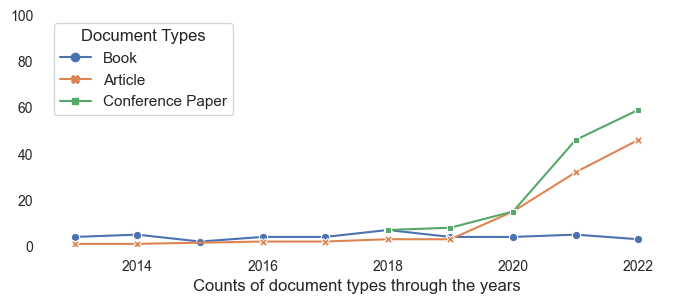

In [10]:
df_sour_only_yrs = df2[['Year', 'Document Type']]
df_sour_only_yrs['Document Type'] = df_sour_only_yrs['Document Type'].replace({'Book Chapter': 'Book'})
# As a chapter is still part of a book
df_sour_only_yrs = df_sour_only_yrs.groupby(['Year'])['Document Type'].value_counts().reset_index(name='total')

f, ax = plt.subplots(figsize=(8, 3))
palette = sns.color_palette("muted")
p = sns.lineplot(
    data=df_sour_only_yrs,
    x="Year", y="total", hue="Document Type", style="Document Type",
    markers=True, dashes=False
)
#p.set(yticklabels=[])
ax.set(ylim=(0, 100))
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of document types through the years", fontsize=12)
p.set_ylabel("",fontsize=8)
plt.legend(title='Document Types', loc='upper left')
p.tick_params(labelsize=10)

In [11]:
# create a separate list for the references
df_references = df2[['index','References']]

# then drop the references column from the data
df2 = df2.drop(columns=['References'])

### Co-authorship network
First check which variable would be better to use for this analysis.

In [11]:
df2['Authors with affiliations']

0     Plaza-del-Arco, F.M., Department of Computer S...
1     Kwarteng, J., Knowledge Media Institute, The O...
2     Nguyen, H., Computer Science & Engineering, Un...
3     Albadi, N., Taibah University, Department of C...
4     Chakravarthi, B.R., National University of Ire...
                            ...                        
53    Connell, S.M., University of Cambridge, United...
55    Stratton, K.B., College of the Humanities, Car...
57    Haslanger, S., Massachusetts Institute of Tech...
59    Harper, S., University of Hull, United Kingdom...
10    Risch, J., Hasso Plattner Institute, Universit...
Name: Authors with affiliations, Length: 282, dtype: object

In [12]:
df2['Authors'].iloc[0]

'Plaza-del-Arco F.M., Molina-González M.D., Ureña-López L.A., Martín-Valdivia M.-T.'

Second one is definitely better.

Find the combination of authors first.

In [13]:
def auth_comb(text):
    text = str(text)
    words= text.split(", ")
    pairs = list(skipgrams(words, n=2, k=len(words)-1))
    return pairs

In [14]:
df2['paired_authors'] = df2['Authors'].apply(auth_comb)
df2['paired_authors']

0     [(Plaza-del-Arco F.M., Molina-González M.D.), ...
1     [(Kwarteng J., Perfumi S.C.), (Kwarteng J., Fa...
2                           [(Nguyen H., Gokhale S.S.)]
3     [(Albadi N., Kurdi M.), (Albadi N., Mishra S.)...
4     [(Chakravarthi B.R., Hande A.), (Chakravarthi ...
                            ...                        
53                                                   []
55                     [(Stratton K.B., Kalleres D.S.)]
57                                                   []
59                                [(Harper S., Yar M.)]
10                             [(Risch J., Krestel R.)]
Name: paired_authors, Length: 282, dtype: object

In [15]:
# only keeping the rows with NO empty lists

data_paired_auth = df2[df2['paired_authors'].map(lambda d: len(d)) > 0]

In [16]:
auth_term_bigram= data_paired_auth['paired_authors']
#auth_bigrams = list(itertools.chain(*auth_term_bigram))
auth_bigrams = list(chain.from_iterable(auth_term_bigram))

# Create counter of words in clean bigrams
auth_bigram_counts = collections.Counter(auth_bigrams)

auth_bigram_counts= auth_bigram_counts.most_common(100)

In [17]:
auth_bigram_counts[0]

(('García-Díaz J.A.', 'Valencia-García R.'), 11)

In [18]:
#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth = pd.DataFrame(auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

#data_paired_auth = data_paired_auth.rename(columns={'index':'auth_bigram', 0:'count'})
data_paired_auth.head()

auth_bigram  count
0    (García-Díaz J.A., Valencia-García R.)     11
1  (Molina-González M.D., Ureña-López L.A.)      4
2    (García-Díaz J.A., Colomo-Palacios R.)      4
3  (Colomo-Palacios R., Valencia-García R.)      4
4                     (Abburi H., Varma V.)      4

In [19]:
# Create dictionary of bigrams and their counts
d = data_paired_auth.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

In [20]:
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

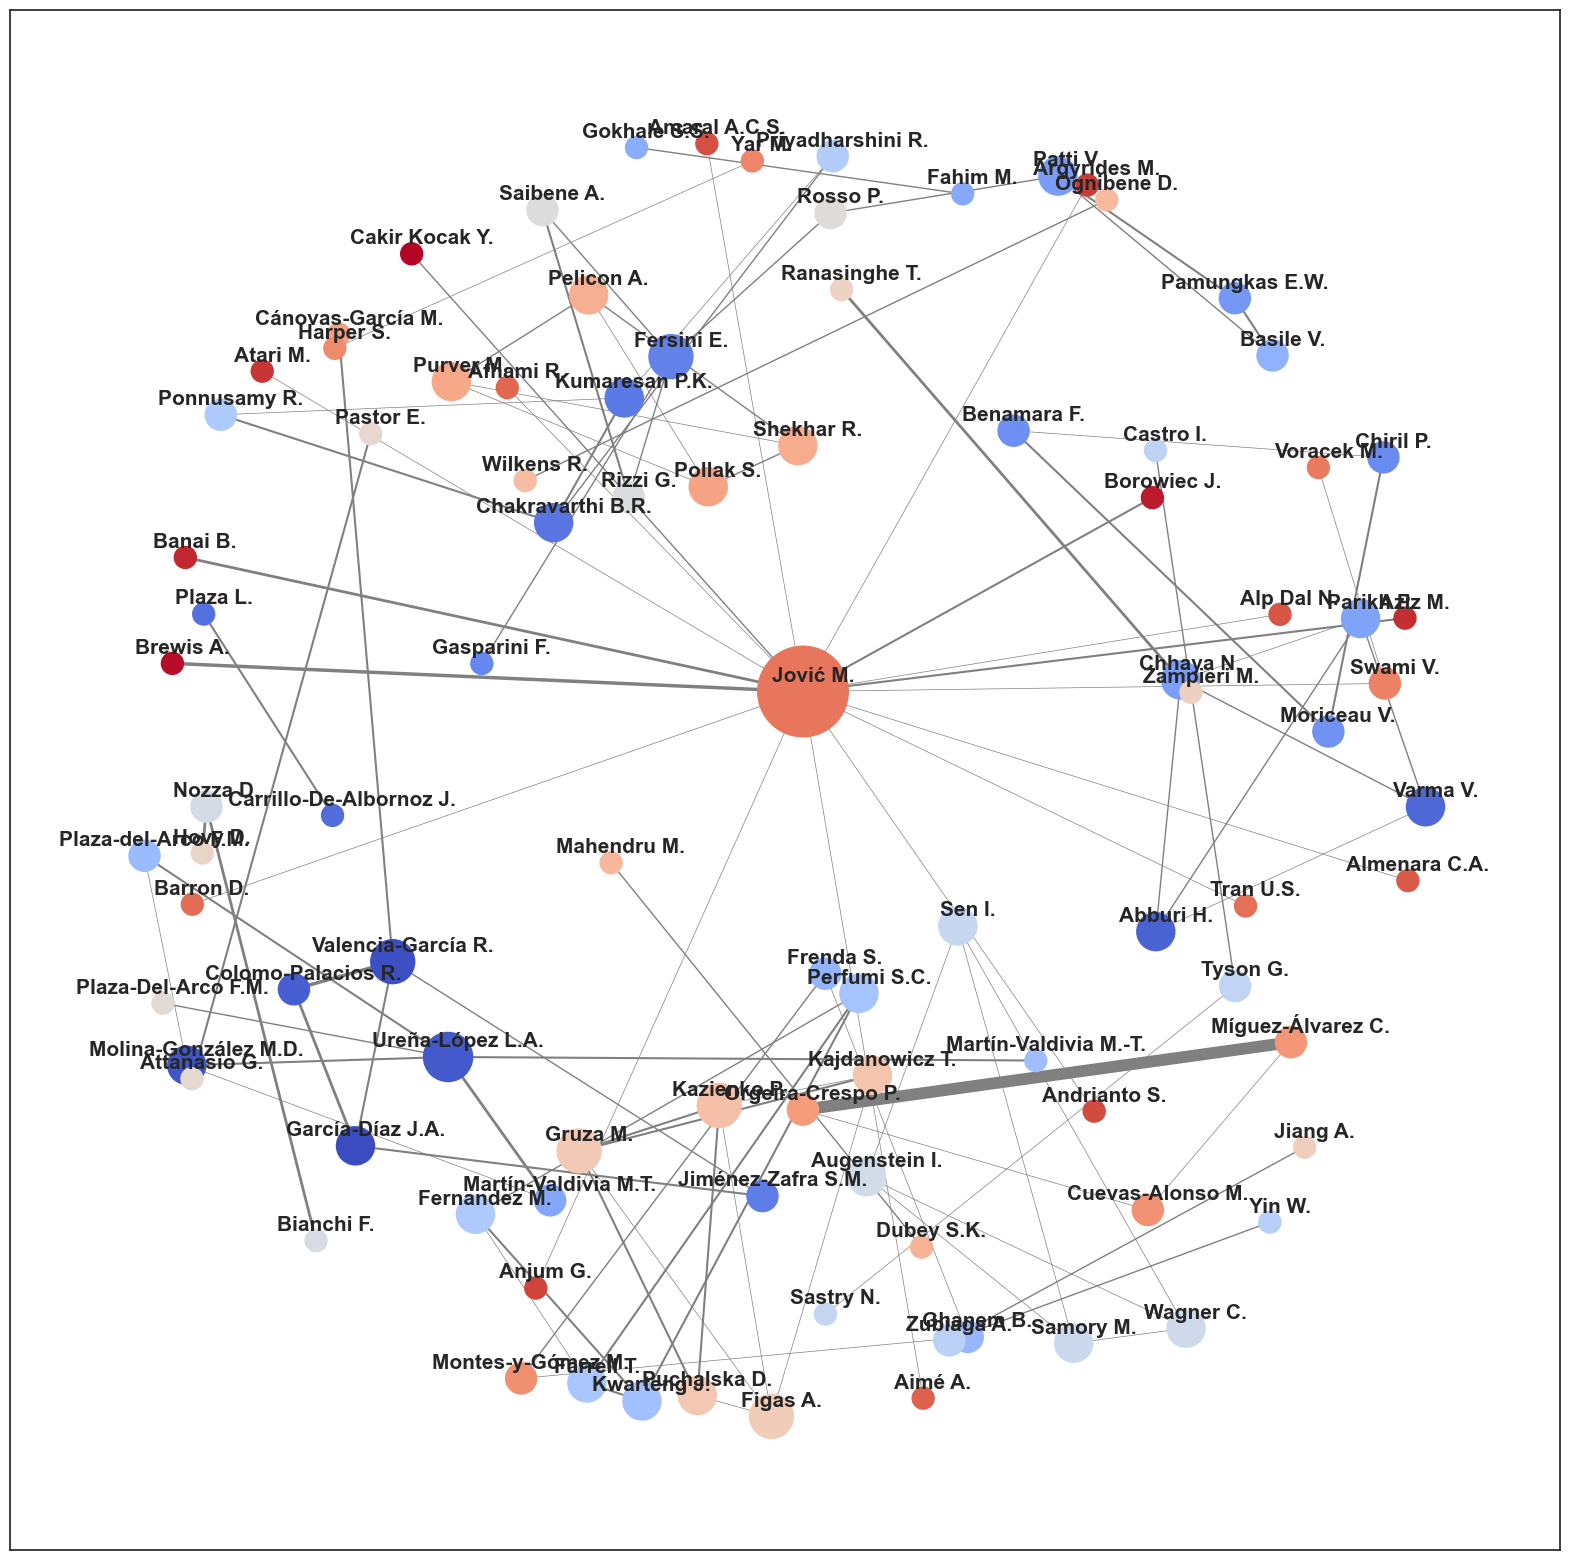

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=[v * 0.5 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],       
                 nodelist=degree.keys(), node_size=[v * 250 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.show()

## Finding the most frequent co-occurence of keywords

Use KeyBERT for this.

In [22]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

def extraction(text):
    keywords = kw_model.extract_keywords(text, 
                                     keyphrase_ngram_range=(1, 2),
                                     stop_words='english', 
                                     highlight=False,
                                     top_n=10)
    listed_keys= []
    for i in keywords:
        listed_keys.append(str(i[0]))
    return listed_keys

df2['keywords_abstract'] = df2['Abstract'].apply(extraction)

In [23]:
df2['keywords_abstract'] 

0     [offensive content, offensive language, langua...
1     [detecting misogynoir, speech hate, misogynoir...
2     [extremism spreads, opposing tweets, mining so...
3     [online radicalization, hateful videos, hate j...
4     [abusive content, automated abusive, lgbtqia, ...
                            ...                        
53    [aristotle sexism, female aristotle, aristotle...
55    [women magic, gender magic, witch hunts, moder...
57    [socially constructed, social construction, th...
59                                                   []
10    [comments journalists, comment ranking, rankin...
Name: keywords_abstract, Length: 282, dtype: object

In [24]:
# Remove collection words
collection_words = ['ai', 'artificial intelligence', 'natural language', 'natural language processing', 'language processing',
                   'nlp', 'machine learning', 'learning', 'deep learning', 'artificial intelligence', 
                    'artificial intelligence ai', 'ai intelligence', 'intelligence ai', 'intelligence'
                   'ml', 'dl', 'ellen wachtel', 'driven recommendation', 'facebook ai']

def remove_words(list_):
    temp_list = []
    intersect = set(list_).intersection(collection_words)
    for i in list_:
        if i in intersect:
            continue
        else:
            temp_list.append(i)
    return temp_list
    
def coupling_terms(list_):
    res= [(j,i) for i in list_ for j in list_ if j not in i 
       if set(j.split('_')[1:]) < set(i.split('_'))][::2]
    return res

In [25]:
df2['coupled_keywords_abstract'] = df2['keywords_abstract'].apply(remove_words)
df2['coupled_keywords_abstract'] = df2['coupled_keywords_abstract'].apply(coupling_terms)
df2['coupled_keywords_abstract'].iloc[0]

[('offensive language', 'offensive content'),
 ('expression offensive', 'offensive content'),
 ('detection offensive', 'offensive content'),
 ('mockery insults', 'offensive content'),
 ('language emotions', 'offensive language'),
 ('insults', 'offensive language'),
 ('insults improper', 'offensive language'),
 ('offensive content', 'language emotions'),
 ('expression offensive', 'language emotions'),
 ('detection offensive', 'language emotions'),
 ('mockery insults', 'language emotions'),
 ('offensive language', 'expression offensive'),
 ('insults', 'expression offensive'),
 ('insults improper', 'expression offensive'),
 ('offensive content', 'insults'),
 ('language emotions', 'insults'),
 ('detection offensive', 'insults'),
 ('mockery insults', 'insults'),
 ('offensive language', 'detection offensive'),
 ('expression offensive', 'detection offensive'),
 ('insults improper', 'detection offensive'),
 ('offensive content', 'insults improper'),
 ('language emotions', 'insults improper'),


In [26]:
terms_b= df2['coupled_keywords_abstract'] 
bigrams = list(chain.from_iterable(terms_b)) #list(itertools.chain(*terms_b))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

#bigram_counts.most_common(100)

In [27]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0   (misogyny identification, automatic misogyny)     15
1   (automatic misogyny, misogyny identification)     12
2                  (automatic misogyny, misogyny)      9
3                                (sexism, sexist)      8
4                                (sexist, sexism)      7
..                                            ...    ...
95                        (sexism social, sexist)      2
96                     (detection sexist, sexist)      2
97                      (sexism, language models)      2
98             (sexism detection, sexist content)      2
99      (sexism detection, sexism classification)      2

[100 rows x 2 columns]

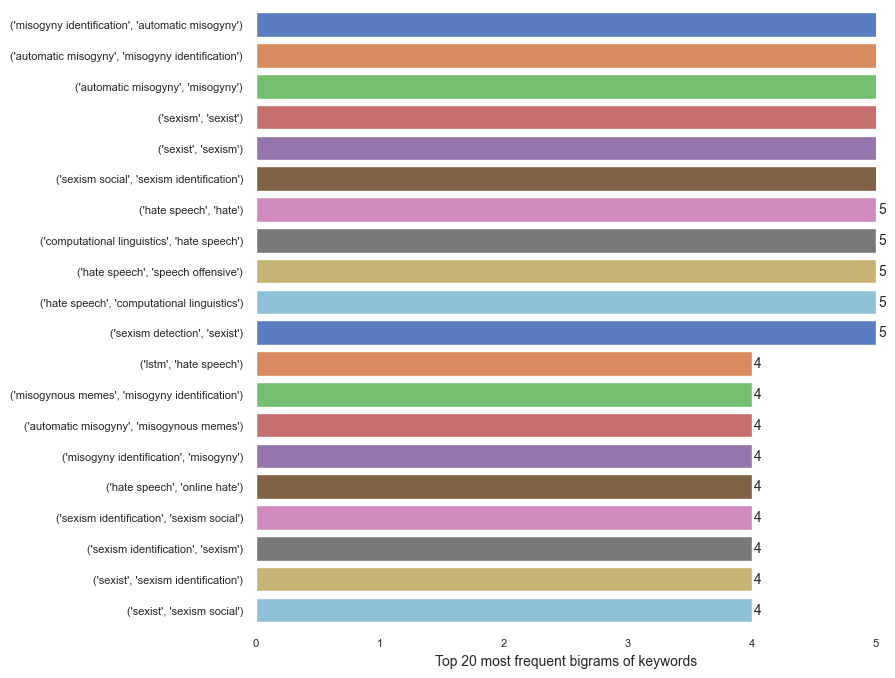

In [28]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_20_bigram = bigram_df[:20]
p = sns.barplot(x="count", y="bigram", data=top_20_bigram,
            label="count", palette=palette)
ax.set(xlim=(0, 5))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=10, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 most frequent bigrams of keywords", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

In [29]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

#G.add_node("sexism", weight=100)
#G.add_node("misogyny", weight=100)

# these two words do not exist

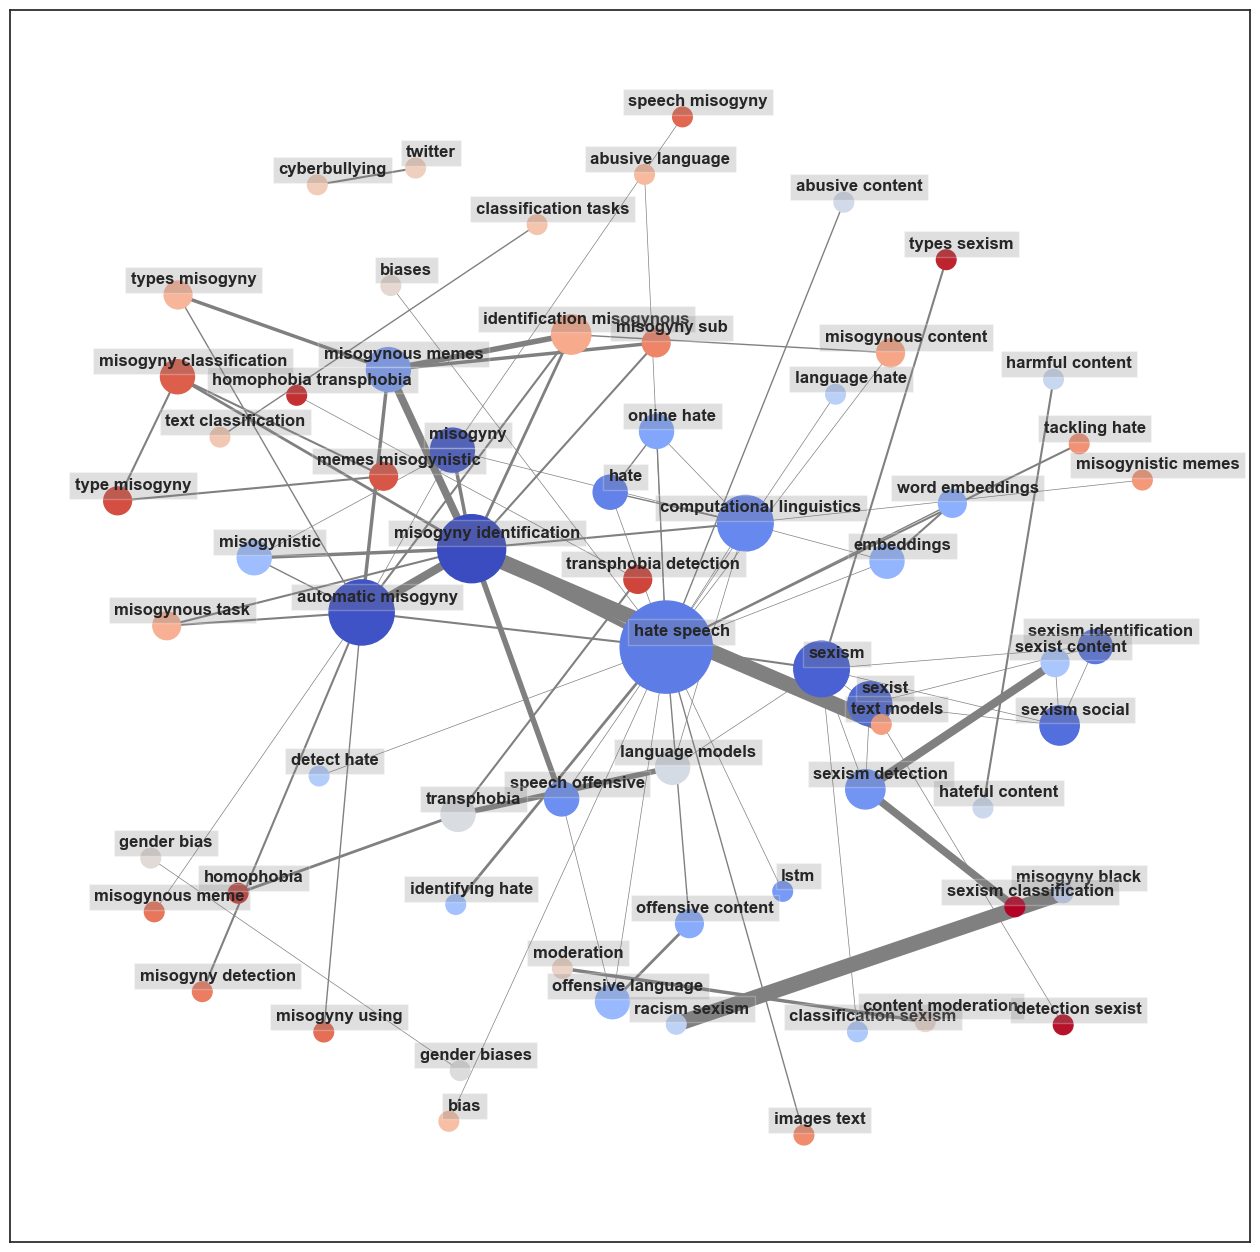

In [30]:
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(16, 16))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=[v * 0.5 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 200 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=12, weight='bold')
    
plt.show()

### Platform of interest

In [32]:
platform_lst = ["twitter", "facebook", "reddit", "instagram", "whatsapp",
                    "gab", "2chan", "4chan", "8chan", "youtube", "linkedin", "tumblr", "news", "survey", "wechat", "weibo"]

pattern = '|'.join(r"\b{}\b".format(x) for x in platform_lst)
df2['platforms'] = df2['Abstract'].str.findall(pattern, flags=re.I).str.join(', ')
df2['platforms'].isna().sum() # A lot of them do not have any of the platforms listed above

0

In [33]:
# Function to remove duplicates
def unique_plat(text):
    if text == (None or ''):
        value = ''
    else:
        value = ', '.join(set(text.lower().split(', ')))
    return value

df2['platforms'] = df2['platforms'].apply(unique_plat)
df2['platforms'].unique() 

array(['', 'youtube', 'twitter', 'instagram', 'news',
       'facebook, instagram, twitter, news', 'weibo, twitter',
       'twitter, gab', 'twitter, news', 'survey', 'reddit',
       'twitter, survey', 'facebook, twitter', 'whatsapp',
       'facebook, youtube, twitter', 'facebook, youtube, news',
       'weibo, news', 'facebook, tumblr, twitter',
       'facebook, youtube, twitter, news', 'facebook, twitter, instagram',
       'whatsapp, twitter'], dtype=object)

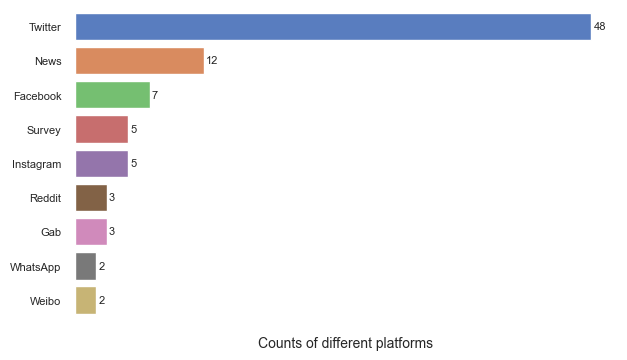

In [34]:
# Taking in only the platforms which showed in the string extraction
twitter_count = df2['platforms'].str.lower().str.contains('twitter').sum()
fb_count = df2['platforms'].str.lower().str.contains('facebook').sum()
news_count = df2['platforms'].str.lower().str.contains('news').sum()
survey_count = df2['platforms'].str.lower().str.contains('survey').sum()
# youtube_count = df2['platforms'].str.lower().str.contains('youtube').sum()
# wechat_count = df2['platforms'].str.lower().str.contains('wechat').sum()
instagram_count = df2['platforms'].str.lower().str.contains('instagram').sum()
reddit_count = df2['platforms'].str.lower().str.contains('reddit').sum()
# linkedin_count = df2["platforms"].str.lower().str.contains('linkedin').sum()
whatsapp_count = df2['platforms'].str.lower().str.contains('whatsapp').sum()
gab_count = df2["platforms"].str.lower().str.contains('gab').sum()
weibo_count = df2["platforms"].str.lower().str.contains('weibo').sum()


df_platform_counts = pd.DataFrame({'Platforms': ['Twitter', 'Facebook', 'News', 'Survey',
                                                    'Instagram', 'Reddit', 'WhatsApp', 'Gab', 'Weibo'], #'YouTube', 'WeChat', 'LinkedIn',  
                                       'Counts': [twitter_count, fb_count, news_count, survey_count,
                                                 instagram_count, reddit_count, whatsapp_count, gab_count, weibo_count]}).sort_values(by='Counts', ascending=False) #youtube_count, wechat_count, linkedin_count, 

f, ax = plt.subplots(figsize=(7, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="Counts", y="Platforms", data=df_platform_counts,
            label="Counts", palette=palette)
#ax.set(xlim=(0, 150))
p.set(xticklabels=[])
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of different platforms", fontsize=10)

p.set_ylabel("",fontsize=8)
p.tick_params(labelsize=8)

## Topic modeling with sentence embedding

In [24]:
#https://www.kdnuggets.com/2020/11/topic-modeling-bert.html
model = SentenceTransformer("distilbert-base-nli-mean-tokens")

sentences = df2['Abstract'].tolist()

sentence_embeddings = model.encode(sentences, show_progress_bar=True)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
umap_data_1 = umap.UMAP(n_neighbors=50, n_components=5, min_dist=0.2, metric='cosine').fit_transform(sentence_embeddings)
umap_data_1.shape

In [ ]:
umap_data_2 = umap.UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine').fit_transform(umap_data_1)
umap_data_2.shape

(719, 2)

In [ ]:
# Prepare data

cluster = hdbscan.HDBSCAN(min_cluster_size=50,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_data_2)

result = pd.DataFrame(umap_data_2, columns=['x', 'y'])
result['labels'] = cluster.labels_

n = len(result.labels.unique())
# depending on the length, visualize the clusters

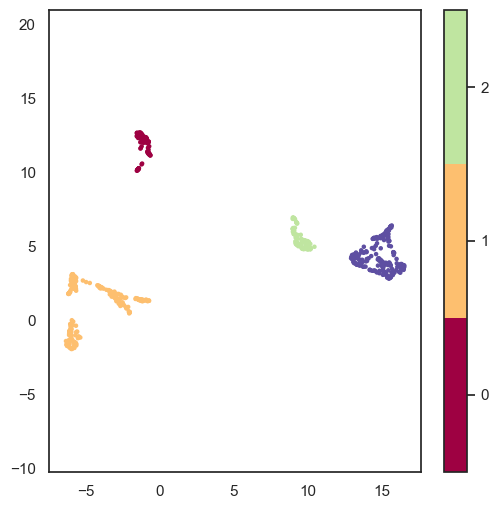

In [ ]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(6, 6))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(n)-0.5).set_ticks(np.arange(n-1)) 
# a more defined version of the colorbar to separate the digit classes. The arrangement of boundaries depend on the labels 
# we got in the previous cell. The grey colors are the outliers.

In [44]:
docs_df = pd.DataFrame(df2)
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Abstract': ' '.join})
docs_df

Authors  \
0   Ali Y.M., Noorsal E., Mokhtar N.F., Saad S.Z.M...   
1                             Beiró M.G., Kalimeri K.   
2   Fosch-Villaronga E., Drukarch H., Khanna P., V...   
3                                          Kuppler M.   
4   Zhou X.-B., Wang Z.-Q., Liang X.-W., Zhang M.,...   
..                                                ...   
80                   Scheller E., Büchel C., Gamer M.   
81  Hammerstingl C., Schueler R., Bors L., Momcilo...   
82  Rodondi N., Locatelli I., Aujesky D., Butler J...   
83  Kim S.-S., Chung Y., Subramanian S.V., William...   
84  Weber D.G., Johnen G., Bryk O., Jöckel K.-H., ...   

                                         Author(s) ID  \
0   57918425700;36718035200;56358453700;5507652250...   
1                            25926918000;36163092300;   
2   57189046483;57223308272;57223279873;5703252710...   
3                                        57203786487;   
4   56726902800;54581723900;57942643700;5636840910...   
..                                                ...   
80                 55322527400;7006466092;8979946100;   
81  6507509501;38663253700;55246607600;37081616300...   
82  6506335496;15035992000;6602653322;57203521637;...   
83   54895028200;54898647400;57203271614;55574201529;   
84  23020169400;6701487929;37067101900;7006425858;...   

                                                Title  Year  \
0   Speech-based gender recognition using linear p...  2022   
1   Fairness in vulnerable attribute prediction on...  2022   
2         Accounting for diversity in AI for medicine  2022   
3   Predicting the future impact of Computer Scien...  2022   
4    Neural Emotion Detection via Personal Attributes  2022   
..                                                ...   ...   
80  Diagnostic features of emotional expressions a...  2012   
81  Diagnostic value of echocardiography in the di...  2012   
82  Framingham risk score and alternatives for pre...  2012   
83  Measuring discrimination in South Korea: Under...  2012   
84  Identification of miRNA-103 in the cellular fr...  2012   

                                         Source title Volume Issue Art. No.  \
0   Indonesian Journal of Electrical Engineering a...     28     2      NaN   
1                 Data Mining and Knowledge Discovery     36     6      NaN   
2                    Computer Law and Security Review     47   NaN   105735   
3                                      Scientometrics    127    11      NaN   
4          Journal of Computer Science and Technology     37     5      NaN   
..                                                ...    ...   ...      ...   
80                                           PLoS ONE      7     7   e41792   
81                                           PLoS ONE      7     6   e38519   
82                                           PLoS ONE      7     3   e34287   
83                                           PLoS ONE      7     3   e32872   
84                                           PLoS ONE      7     1   e30221   

   Page start Page end  ...  Language of Original Document  \
0         753      761  ...                        English   
1        2194     2213  ...                        English   
2         NaN      NaN  ...                        English   
3        6695     6732  ...                        English   
4        1146     1160  ...                        English   
..        ...      ...  ...                            ...   
80        NaN      NaN  ...                        English   
81        NaN      NaN  ...                        English   
82        NaN      NaN  ...                        English   
83        NaN      NaN  ...                        English   
84        NaN      NaN  ...                        English   

                    Abbreviated Source Title Document Type Publication Stage  \
0   Indones. J. Electrical Eng. Comput. Sci.       Article             Final   
1                   Data Min. Knowl. Discov.       Article       

In [45]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic['Abstract'].values, m=len(docs_df))

In [49]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df2.groupby(['Topic'])
                     ['Abstract']
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Abstract": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

Topic  Size
1      1   269
3      3   247
2      2   105
0      0    98

In [54]:
top_n_words[3][:30]

[('racial', 0.006491018476121327),
 ('identity', 0.006124484939106301),
 ('trans', 0.005947826258856011),
 ('health', 0.005862669234388622),
 ('transgender', 0.005771256286043172),
 ('rights', 0.005714331288907507),
 ('ethnic', 0.005667173077370306),
 ('experiences', 0.005580058773228533),
 ('minority', 0.005501325546182093),
 ('sexual', 0.005328326863039706),
 ('mental', 0.005223618522295258),
 ('american', 0.004884848752197284),
 ('people', 0.004815082620111024),
 ('perceived', 0.004601070363850014),
 ('psychological', 0.00447528799583962),
 ('sex', 0.004407059912735006),
 ('self', 0.004170204051594479),
 ('stress', 0.004124239453351266),
 ('identities', 0.004067145096118805),
 ('violence', 0.0038624339482281923)]

In [53]:
top_n_words[2][:30]

[('sexism', 0.007883930914194634),
 ('men', 0.007515180740998032),
 ('female', 0.007472861044983484),
 ('job', 0.007324742116609752),
 ('faculty', 0.006575689506811121),
 ('industries', 0.006117683834064911),
 ('male', 0.005844895698468203),
 ('workplace', 0.005766565286744171),
 ('attitudes', 0.005706873412417295),
 ('cent', 0.005647249947304823),
 ('bias', 0.005504549226786219),
 ('soccer', 0.005471470463336668),
 ('research', 0.005334659565091261),
 ('likely', 0.005247377381471648),
 ('inequality', 0.005245741362047742),
 ('students', 0.005050771005278769),
 ('work', 0.004859721971621562),
 ('harassment', 0.004669410138677868),
 ('birth', 0.00463003829892417),
 ('stereotypes', 0.004573080859843852)]

## Word + Doc embeddings

In [162]:
# Word embedding model
ft = api.load('fasttext-wiki-news-subwords-300')

# Step 1a - Extract embeddings.
embedding_model = SentenceTransformer("distilbert-base-nli-mean-tokens")   #"all-MiniLM-L6-v2", "xlm-r-bert-base-nli-stsb-mean-tokens"

# Step 1b - Extract embedding
# Create a model that uses both language models and pass it through BERTopic
word_doc_embedder = WordDocEmbedder(embedding_model=embedding_model, word_embedding_model=ft)

# Step 2 - Reduce dimensionality.
umap_model = umap.UMAP(n_neighbors=50, n_components=20, min_dist=0.0, metric='cosine', random_state=123)

# Step 3 - Cluster reduced embeddings.
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics.
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation.
ctfidf_model = ClassTfidfTransformer() # reduce_frequent_words=True

topic_model = BERTopic(
    language='multilingual', # Set to 'multilingual' for datasets with languages other than English. # a few other languages set so changing from 'english'
    top_n_words=10,
    n_gram_range=(1, 3),
    min_topic_size=5,
    nr_topics= None, #"auto"
    low_memory=False,
    calculate_probabilities=True, # The probabilities of all topics per document.
    embedding_model=word_doc_embedder,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    #diversity=0.0,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    verbose=False
)

In [163]:
topics, probs = topic_model.fit_transform(df2['Abstract'].to_list())

In [164]:
info = topic_model.get_topic_info()
info

Topic  Count                                 Name
0     -1    119          -1_social_women_sexism_hate
1      0     56     0_social_media_content_detection
2      1     41           1_gender_women_book_female
3      2     39             2_task_paper_2022_models
4      3     17  3_language_models_content_offensive
5      4     10           4_hate_speech_internet_rap

In [165]:
topic_model.generate_topic_labels()

['-1_social_women_sexism',
 '0_social_media_content',
 '1_gender_women_book',
 '2_task_paper_2022',
 '3_language_models_content',
 '4_hate_speech_internet']

In [173]:
topics_change = {-1: 'Outliers', 0:'Social media content', 1: 'Gender studies', 2: 'Shared tasks', 3: 'LLMs', 4: 'Hate Speech'}
topic_model.set_topic_labels(topics_change)

In [174]:
get_document_info = topic_model.get_document_info(df2['Abstract'].tolist())
get_document_info['index'] = get_document_info.index
get_document_info

Document  Topic  \
0    The analysis and detection of offensive conten...      3   
1    “Misogynoir” is a term that refers to the anti...     -1   
2    Proud Boys, a contemporary radical extremist g...     -1   
3    Growing evidence suggests that YouTube's recom...      0   
4    Homophobia or Transphobia can be defined as th...     -1   
..                                                 ...    ...   
277  Aristotle’s account of female nature has recei...      1   
278  This volume unites research on the problem of ...      1   
279  Contemporary theorists use the term "social co...      1   
280                                                        -1   
281  The comment sections of online news platforms ...      0   

                                    Name            CustomName  \
0    3_language_models_content_offensive                  LLMs   
1            -1_social_women_sexism_hate              Outliers   
2            -1_social_women_sexism_hate              Outliers   
3       0_social_media_content_detection  Social media content   
4            -1_social_women_sexism_hate              Outliers   
..                                   ...                   ...   
277           1_gender_women_book_female        Gender studies   
278           1_gender_women_book_female        Gender studies   
279           1_gender_women_book_female        Gender studies   
280          -1_social_women_sexism_hate              Outliers   
281     0_social_media_content_detection  Social media content   

                                           Top_n_words  Probability  \
0    language - models - content - offensive - dete...     0.468075   
1    social - women - sexism - hate - models - spee...     0.426683   
2    social - women - sexism - hate - models - spee...     0.363783   
3    social - media - content - detection - speech ...     0.552873   
4    social - women - sexism - hate - models - spee...     0.317439   
..                                                 ...          ...   
277  gender - women - book - female - feminist - st...     0.420699   
278  gender - women - book - female - feminist - st...     1.000000   
279  gender - women - book - female - feminist - st...     0.600524   
280  social - women - sexism - hate - models - spee...     0.734749   
281  social - media - content - detection - speech ...     0.582461   

     Representative_document  index  
0                      False      0  
1                      False      1  
2                      False      2  
3                      False      3  
4                      False      4  
..                       ...    ...  
277                    False    277  
278                    False    278  
279                    False    279  
280                    False    280  
281                    False    281  

[282 rows x 8 columns]

In [175]:
topics_only = get_document_info[['index', 'Topic']]

# Merge it with the original dataset
df2 = pd.merge(df2, topics_only, how='left', on='index')

In [176]:
get_document_info[get_document_info['Representative_document'] == True]

Document  Topic  \
28   This paper describes our system used in the Se...      2   
50   Identifying and classifying sexist content in ...      3   
58   In this paper we present our approach and syst...      2   
60   This paper presents the contribution of the UM...      2   
67   The rise of social networks has allowed misogy...      4   
72   Automatic detection of abusive online content ...      3   
75   Hate Speech and harassment are widespread in o...     -1   
77   Social media platforms generate an enormous am...      0   
89   Nowadays, due to the great uncontrolled conten...      0   
100  The important growth of social media and onlin...     -1   
127  Platforms that feature user-generated content ...      3   
135  Online social networks allow powerless people ...      4   
143  During the last decade, hateful and sexist con...     -1   
252  Psychiatry and psychology have a long and high...      1   
256  Alternative (or "underground") rap music prove...      4   
259  Thoroughly updated in this second edition, Int...      1   
263  With the rise in the usage of different social...      0   
274  Despite attempts to increase gender parity in ...      1   

                                    Name            CustomName  \
28              2_task_paper_2022_models          Shared tasks   
50   3_language_models_content_offensive                  LLMs   
58              2_task_paper_2022_models          Shared tasks   
60              2_task_paper_2022_models          Shared tasks   
67            4_hate_speech_internet_rap           Hate Speech   
72   3_language_models_content_offensive                  LLMs   
75           -1_social_women_sexism_hate              Outliers   
77      0_social_media_content_detection  Social media content   
89      0_social_media_content_detection  Social media content   
100          -1_social_women_sexism_hate              Outliers   
127  3_language_models_content_offensive                  LLMs   
135           4_hate_speech_internet_rap           Hate Speech   
143          -1_social_women_sexism_hate              Outliers   
252           1_gender_women_book_female        Gender studies   
256           4_hate_speech_internet_rap           Hate Speech   
259           1_gender_women_book_female        Gender studies   
263     0_social_media_content_detection  Social media content   
274           1_gender_women_book_female        Gender studies   

                                           Top_n_words  Probability  \
28   task - paper - 2022 - models - classification ...     0.636320   
50   language - models - content - offensive - dete...     0.511878   
58   task - paper - 2022 - models - classification ...     1.000000   
60   task - paper - 2022 - models - classification ...     1.000000   
67   hate - speech - internet - rap - players - abu...     1.000000   
72   language - models - content - offensive - dete...     0.603015   
75   social - women - sexism - hate - models - spee...     0.017890   
77   social - media - content - detection - speech ...     0.688505   
89   social - media - content - detection - speech ...     1.000000   
100  social - women - sexism - hate - models - spee...     0.592696   
127  language - models - content - offensive - dete...     0.463335   
135  hate - speech - internet - rap - players - abu...     1.000000   
143  social - women - sexism - hate - models - spee...     0.341168   
252  gender - women - book - female - feminist - st...     0.466260   
256  hate - speech - internet - rap - players - abu...     1.000000   
259  gender - women - book - female - feminist - st...     1.000000   
263  social - media - content - detection - speech ...     0.641323   
274  gender - women - book - female - feminist - st...     0.201213   

     Representative_document  index  
28                      True     28  
50                      True     50  
58                      True     58  
60                      True     60  
67             

In [177]:
t = topic_model.topic_representations_
t

{-1: [('social', 0.027287378296818602),
  ('women', 0.02486233635157649),
  ('sexism', 0.02417611767156763),
  ('hate', 0.023926565674812342),
  ('models', 0.022659400056670435),
  ('speech', 0.021949232036592038),
  ('model', 0.020867736369737263),
  ('based', 0.020809557735477147),
  ('data', 0.020430222614491126),
  ('different', 0.02003844727169407)],
 0: [('social', 0.04690480111277267),
  ('media', 0.03611708047977209),
  ('content', 0.028945144236340512),
  ('detection', 0.027909844407507153),
  ('speech', 0.027434014029117635),
  ('task', 0.027104987229311144),
  ('hate', 0.026654860742895532),
  ('abusive', 0.02578248342318622),
  ('language', 0.025089591481500053),
  ('twitter', 0.024702446575877824)],
 1: [('gender', 0.07550892842871547),
  ('women', 0.055402206935054064),
  ('book', 0.034052825597905484),
  ('female', 0.02966234032006545),
  ('feminist', 0.02834903092676242),
  ('studies', 0.027637799234512272),
  ('research', 0.025014177414977374),
  ('social', 0.021968282

In [178]:
n = info.Topic.count() - 1 # considering the outlier
topic_model.visualize_barchart(topics=None, top_n_topics=n, n_words=10, custom_labels=True, width=250, height=350)

In [179]:
topic_model.visualize_documents(df2['Abstract'].to_list(), custom_labels=True, width=750, height=500)

## Supervised Topic Modeling
Now that we have tried the unsupervised approach, let's try and see with supervised approach. <br>
The reason for trying this approach is because we saw from the previous section that the topic model was not able to properly capture the topic, and the topics were very arbitray, with majority focusing on manuscripts published by the Computer Science department, as it forms the majority of the manuscripts fetched.

Since we already have a bunch of clusters or classes from which we want to model the topics, i.e., the disciplines. 

In [218]:
docs = df2['Abstract']

# But  first we have to change the string target values, i.e., disciplines to integer form
# Label encoder is used for this
# Create an object for LabelEncoder with no parameters
le = LabelEncoder()
# Now transform
y = le.fit_transform(df2['Discipline'])

In [219]:
# Skip over dimensionality reduction, replace cluster model with classifier,
# and reduce frequent words while we are at it.
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create representation models
keybert_model = KeyBERTInspired(top_n_words=20)
mmr_model = MaximalMarginalRelevance(diversity=0.2)
pos_patterns = [
            [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
            [{'POS': 'NOUN'}], [{'POS': 'ADJ'}]
]
pos_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns) 

representation_models = [pos_model, keybert_model, mmr_model]

In [220]:
# Create a fully supervised BERTopic instance
topic_model_sup= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model,
        representation_model=representation_models
)
topics_sup, probs_sup = topic_model_sup.fit_transform(docs.to_list(), y=y)

In [221]:
topic_model_sup.get_topic_info()

Topic  Count                                           Name
0      0    175         0_linguistics_tweets_language_misogyny
1      1     88          1_feminism_feminist_patriarchy_sexist
2      2     10  2_socialsexual_misogynistic_gender_harassment
3      3      5         3_gender_ideology_antiquity_philosophy
4      4      2            4_biases_bias_gender_discrimination
5      5      1     5_dialogs_conversations_journalists_dialog
6      6      1       6_intimidation_racism_instagram_facebook

In [239]:
topic_model_sup.generate_topic_labels()

['0_linguistics_tweets_language',
 '1_feminism_feminist_patriarchy',
 '2_socialsexual_misogynistic_gender',
 '3_gender_ideology_antiquity',
 '4_biases_bias_gender',
 '5_dialogs_conversations_journalists',
 '6_intimidation_racism_instagram']

In [240]:
# Change the topic names
topic_labels = {0: 'Linguistics in social media', 1:'Feminism/Feminist theories', 2: 'Misogyny/Sexism', 3:'Gender Studies', 4: 'Gender Bias', 5:'Gender in journalism', 6: 'Racism'}
topic_model_sup.set_topic_labels(topic_labels)

In [241]:
# Map input `y` to topics
mappings = topic_model_sup.topic_mapper_.get_mappings()
mappings = {value: df2["Discipline"][key] for key, value in mappings.items()}
y_mapped = [mappings[val] for val in y]

# Assign original classes to our topics
supervised_mapping_doc = topic_model_sup.get_topic_info()
supervised_mapping_doc["Class"] = supervised_mapping_doc.Topic.map(mappings)

In [242]:
mappings.items() # Not much info

dict_items([(3, 0     Computer Science
0           Psychology
0    Multidisciplinary
Name: Discipline, dtype: object), (0, 1    Computer Science
1          Psychology
Name: Discipline, dtype: object), (5, 2    Computer Science
2          Psychology
Name: Discipline, dtype: object), (6, 3     Computer Science
3    Multidisciplinary
Name: Discipline, dtype: object), (4, 4    Computer Science
4         Engineering
Name: Discipline, dtype: object), (2, 5    Computer Science
5      Social Science
5          Psychology
Name: Discipline, dtype: object), (1, 6    Computer Science
6          Psychology
Name: Discipline, dtype: object)])

In [244]:
supervised_mapping_doc = supervised_mapping_doc.rename(columns={'CustomName': 'Topic Name'})
supervised_mapping_doc

Topic  Count                                           Name  \
0      0    175         0_linguistics_tweets_language_misogyny   
1      1     88          1_feminism_feminist_patriarchy_sexist   
2      2     10  2_socialsexual_misogynistic_gender_harassment   
3      3      5         3_gender_ideology_antiquity_philosophy   
4      4      2            4_biases_bias_gender_discrimination   
5      5      1     5_dialogs_conversations_journalists_dialog   
6      6      1       6_intimidation_racism_instagram_facebook   

                    Topic Name  \
0  Linguistics in social media   
1   Feminism/Feminist theories   
2              Misogyny/Sexism   
3               Gender Studies   
4                  Gender Bias   
5         Gender in journalism   
6                       Racism   

                                               Class  
0  1    Computer Science
1          Psychology
Na...  
1  6    Computer Science
6          Psychology
Na...  
2  5    Computer Science
5      Social Science
5 ...  
3  0     Computer Science
0           Psychology
...  
4  4    Computer Science
4         Engineering
Na...  
5  2    Computer Science
2          Psychology
Na...  
6  3     Computer Science
3    Multidisciplinary
...

The classes need to be arranged in a better way. Next step is to note down the disciplines which fall under the same topic.

In [277]:
def sep_class(classes):
    # convert to string object
    classes = classes.to_string()
    # Firstremove the number from the beginning
    classes = classes[2:] 
    # remove spaces at beginning and end
    classes = classes.strip()
    # remove new line character
    classes = ' '.join(classes.splitlines())
    # Specify what pattern we are looking into
    pattern = r'[0-9]' # as focused on numbers only
    # Then find the pattern and change it
    classes = re.sub(pattern, ',', classes)
    classes = classes.replace(' ', '')
    # Convert each element to list item
    classes = classes.split(',')
    return classes

In [278]:
supervised_mapping_doc['class_list'] = supervised_mapping_doc['Class'].apply(sep_class)

In [279]:
supervised_mapping_doc

Topic  Count                                           Name  \
0      0    175         0_linguistics_tweets_language_misogyny   
1      1     88          1_feminism_feminist_patriarchy_sexist   
2      2     10  2_socialsexual_misogynistic_gender_harassment   
3      3      5         3_gender_ideology_antiquity_philosophy   
4      4      2            4_biases_bias_gender_discrimination   
5      5      1     5_dialogs_conversations_journalists_dialog   
6      6      1       6_intimidation_racism_instagram_facebook   

                    Topic Name  \
0  Linguistics in social media   
1   Feminism/Feminist theories   
2              Misogyny/Sexism   
3               Gender Studies   
4                  Gender Bias   
5         Gender in journalism   
6                       Racism   

                                               Class  \
0  1    Computer Science
1          Psychology
Na...   
1  6    Computer Science
6          Psychology
Na...   
2  5    Computer Science
5      Social Science
5 ...   
3  0     Computer Science
0           Psychology
...   
4  4    Computer Science
4         Engineering
Na...   
5  2    Computer Science
2          Psychology
Na...   
6  3     Computer Science
3    Multidisciplinary
...   

                                         class_list  
0                     [ComputerScience, Psychology]  
1                     [ComputerScience, Psychology]  
2      [ComputerScience, SocialScience, Psychology]  
3  [ComputerScience, Psychology, Multidisciplinary]  
4                    [ComputerScience, Engineering]  
5                     [ComputerScience, Psychology]  
6              [ComputerScience, Multidisciplinary]

In [287]:
document_info_sup = topic_model_sup.get_document_info(df2['Abstract'].to_list())
document_info_sup["Class"] = document_info_sup.Topic.map(mappings)
document_info_sup['class_list'] = document_info_sup['Class'].apply(sep_class)
document_info_sup = document_info_sup.rename(columns={'CustomName': 'Topic Name'})
document_info_sup['index'] = document_info_sup.index
document_info_sup

Document  Topic  \
0    The analysis and detection of offensive conten...      0   
1    “Misogynoir” is a term that refers to the anti...      0   
2    Proud Boys, a contemporary radical extremist g...      0   
3    Growing evidence suggests that YouTube's recom...      0   
4    Homophobia or Transphobia can be defined as th...      0   
..                                                 ...    ...   
277  Aristotle’s account of female nature has recei...      3   
278  This volume unites research on the problem of ...      3   
279  Contemporary theorists use the term "social co...      3   
280                                                         3   
281  The comment sections of online news platforms ...      5   

                                           Name                   Topic Name  \
0        0_linguistics_tweets_language_misogyny  Linguistics in social media   
1        0_linguistics_tweets_language_misogyny  Linguistics in social media   
2        0_linguistics_tweets_language_misogyny  Linguistics in social media   
3        0_linguistics_tweets_language_misogyny  Linguistics in social media   
4        0_linguistics_tweets_language_misogyny  Linguistics in social media   
..                                          ...                          ...   
277      3_gender_ideology_antiquity_philosophy               Gender Studies   
278      3_gender_ideology_antiquity_philosophy               Gender Studies   
279      3_gender_ideology_antiquity_philosophy               Gender Studies   
280      3_gender_ideology_antiquity_philosophy               Gender Studies   
281  5_dialogs_conversations_journalists_dialog         Gender in journalism   

                                           Top_n_words  \
0    linguistics - tweets - language - misogyny - o...   
1    linguistics - tweets - language - misogyny - o...   
2    linguistics - tweets - language - misogyny - o...   
3    linguistics - tweets - language - misogyny - o...   
4    linguistics - tweets - language - misogyny - o...   
..                                                 ...   
277  gender - ideology - antiquity - philosophy - a...   
278  gender - ideology - antiquity - philosophy - a...   
279  gender - ideology - antiquity - philosophy - a...   
280  gender - ideology - antiquity - philosophy - a...   
281  dialogs - conversations - journalists - dialog...   

     Representative_document  \
0                      False   
1                      False   
2                      False   
3                      False   
4                      False   
..                       ...   
277                    False   
278                     True   
279                     True   
280                    False   
281                     True   

                                                 Class  \
0    1    Computer Science
1          Psychology
Na...   
1    1    Computer Science
1          Psychology
Na...   
2    1    Computer Science
1          Psychology
Na...   
3    1    Computer Science
1          Psychology
Na...   
4    1    Computer Science
1          Psychology
Na...   
..                                                 ...   
277  0     Computer Science
0           Psychology
...   
278  0     Computer Science
0           Psychology
...   
279  0     Computer Science
0           Psychology
...   
280  0     Computer Science
0           Psychology
...   
281  2    Computer Science
2          Psychology
Na...   

                                           class_list  index  
0                       [ComputerScience, Psychology]      0  
1                       [ComputerScience, Psychology]      1  
2                       [ComputerScience, Psychology]      2  
3                       [ComputerScience, Psychology]      3  
4                       [ComputerScience, Psychology]      4  
..                                                ...    ...  
277  [ComputerScience, Psychology, Multidisciplinary]    277  
278  [ComputerScience

In [288]:
topics_only = document_info_sup[['index', 'Topic Name', 'class_list']]

# Merge it with the original dataset
df2 = pd.merge(df2, topics_only, how='left', on='index')

### Creating abstract embedding
Using SciBERT for that

In [97]:
#
# !wget -O scibert_uncased.tar https://s3-us-west-2.amazonaws.com/ai2-s2-research/scibert/huggingface_pytorch/scibert_scivocab_uncased.tar
# !tar -xvf scibert_uncased.tar

model_version = 'scibert_scivocab_uncased'
do_lower_case = True
model = BertModel.from_pretrained(model_version, use_auth_token=True)

Some weights of the model checkpoint at scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Finding similar documents with Word2Vec and Soft Cosine Measure


Soft Cosine Measure (SCM) is a method that allows us to assess the similarity between two documents in a meaningful way, even when they have no words in common. It uses a measure of similarity between words, which can be derived using word2vec vector embeddings of words. It has been shown to outperform many of the state-of-the-art methods in the semantic text similarity task in the context of community question answering.

Even when the sentences have no words in common, but by modeling synonymy, SCM is able to accurately measure the similarity between the two sentences. The method also uses the bag-of-words vector representation of the documents (simply put, the word's frequencies in the documents). The intution behind the method is that we compute standard cosine similarity assuming that the document vectors are expressed in a non-orthogonal basis, where the angle between two basis vectors is derived from the angle between the word2vec embeddings of the corresponding words.

In [41]:
# List of all the titles
titles = [item for item in df2['Title']]

# List of all the abstracts
documents = [item for item in df2['Abstract']]


In [42]:
print(f'{len(documents)} documents')

282 documents


In [43]:
# Support functions for pre-processing and calculation
# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb

def preprocess(doc):
    doc = str(doc)
    # Tokenize, clean up input document string
    doc = sub(r'<img[^<>]+(>|$)', " image_token ", doc)
    doc = sub(r'<[^<>]+(>|$)', " ", doc)
    doc = sub(r'\[img_assist[^]]*?\]', " ", doc)
    doc = sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', " url_token ", doc)
    return [token for token in simple_preprocess(doc, min_len=0, max_len=float("inf")) if token not in stopwords]

In [44]:
# Preprocess the documents
corpus = [preprocess(document) for document in documents]

#### Build the model

In [45]:
%%time

# Download and/or load the GloVe word vector embeddings

if 'glove' not in locals():  # only load if not already in memory
    glove = api.load("glove-wiki-gigaword-50")
    
similarity_index = WordEmbeddingSimilarityIndex(glove)

CPU times: user 7.2 s, sys: 96.6 ms, total: 7.3 s
Wall time: 7.57 s


In [46]:
%%time

# Build the term dictionary, TF-idf model
dictionary = Dictionary(corpus)
tfidf = TfidfModel(dictionary=dictionary)

CPU times: user 25.1 ms, sys: 1.7 ms, total: 26.8 ms
Wall time: 27.6 ms


In [47]:
%%time

# Create the term similarity matrix. 
# The nonzero_limit enforces sparsity by limiting the number of non-zero terms in each column. 
# For my application, I got best results by removing the default value of 100
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary, tfidf)  # , nonzero_limit=None)

100%|██████████| 5437/5437 [00:50<00:00, 108.64it/s]

CPU times: user 5min 19s, sys: 28.3 s, total: 5min 48s
Wall time: 50.1 s


In [48]:
df2['Abstract'].isna().sum() # Quite a few do not have abstracts

0

Let's see what document types these missing abstracts fall on.

In [49]:
df2[df2['Abstract'].isna()]['Document Type'].value_counts()

Series([], Name: Document Type, dtype: int64)

In [50]:
def similarity_score_index(text):
    # Compute Soft Cosine Measure between the text and the documents.
    listed_idx = []
    if text == ('' or None):
        listed_idx = []
    else:
        # be sure to split sentence before feed into Dictionary
        text = text.split()
        text_tf = tfidf[dictionary.doc2bow(text)]
        
        index = SoftCosineSimilarity(
                    tfidf[[dictionary.doc2bow(document) for document in corpus]],
                    similarity_matrix)
        
        doc_similarity_scores = index[text_tf]
        
        sorted_indexes = np.argsort(doc_similarity_scores)[::-1]
        
        # Not keeping the first one, as it is the text whose similarity we are checking, and keep only the first 3
        for idx in sorted_indexes[1:4]: 
            listed_idx.append(idx)
    return listed_idx

In [51]:
test = df2['Abstract'].iloc[0]
similarity_score_index(test)

[189, 137, 148]

In [52]:
df2['conn_idx'] = df2['Abstract'].apply(similarity_score_index)

In [53]:
df2['conn_idx']

0      [189, 137, 148]
1        [56, 123, 64]
2        [99, 17, 125]
3      [134, 115, 126]
4         [234, 13, 2]
            ...       
277    [274, 235, 243]
278    [118, 233, 272]
279      [0, 178, 218]
280                 []
281     [225, 24, 246]
Name: conn_idx, Length: 282, dtype: object

In [54]:
#df2['conn_idx'].iloc[11] # Check the index with no abstract

In [55]:
df2['conn_idx'].iloc[12] #Check 

[101, 100, 88]

Now try to create edgelist with all of them.

In [56]:
# https://github.com/loubnabnl/Link-Prediction-in-Citation-Graphs/blob/master/source/abstract_word2vec_embedding.py

df_edgelist = df2[['index', 'conn_idx']]
df_edgelist

index         conn_idx
0        0  [189, 137, 148]
1        1    [56, 123, 64]
2        2    [99, 17, 125]
3        3  [134, 115, 126]
4        4     [234, 13, 2]
..     ...              ...
277     53  [274, 235, 243]
278     55  [118, 233, 272]
279     57    [0, 178, 218]
280     59               []
281     10   [225, 24, 246]

[282 rows x 2 columns]

In [57]:
# Creating a tuple list of each row index with its similarity index

def create_tuple(texts):
    col1 = texts['index']
    col2 = texts['conn_idx']
    if col2 != []:
        result = []
        for i in col2:
            val = tuple([col1, i])
            result.append(val)
        return result

In [58]:
df_edgelist['paired_tuples'] = df_edgelist.apply(create_tuple, axis = 1)
df_edgelist['paired_tuples']

0         [(0, 189), (0, 137), (0, 148)]
1           [(1, 56), (1, 123), (1, 64)]
2           [(2, 99), (2, 17), (2, 125)]
3         [(3, 134), (3, 115), (3, 126)]
4            [(4, 234), (4, 13), (4, 2)]
                     ...                
277    [(53, 274), (53, 235), (53, 243)]
278    [(55, 118), (55, 233), (55, 272)]
279      [(57, 0), (57, 178), (57, 218)]
280                                 None
281     [(10, 225), (10, 24), (10, 246)]
Name: paired_tuples, Length: 282, dtype: object

In [59]:
exploded_pairs = df_edgelist[df_edgelist.conn_idx.astype(bool)]
exploded_pairs

index         conn_idx                      paired_tuples
0        0  [189, 137, 148]     [(0, 189), (0, 137), (0, 148)]
1        1    [56, 123, 64]       [(1, 56), (1, 123), (1, 64)]
2        2    [99, 17, 125]       [(2, 99), (2, 17), (2, 125)]
3        3  [134, 115, 126]     [(3, 134), (3, 115), (3, 126)]
4        4     [234, 13, 2]        [(4, 234), (4, 13), (4, 2)]
..     ...              ...                                ...
276     40   [201, 82, 260]   [(40, 201), (40, 82), (40, 260)]
277     53  [274, 235, 243]  [(53, 274), (53, 235), (53, 243)]
278     55  [118, 233, 272]  [(55, 118), (55, 233), (55, 272)]
279     57    [0, 178, 218]    [(57, 0), (57, 178), (57, 218)]
281     10   [225, 24, 246]   [(10, 225), (10, 24), (10, 246)]

[277 rows x 3 columns]

In [60]:
# Now make a list of the tuples

# First remove NoneType values
exploded_pairs = df_edgelist[df_edgelist.conn_idx.astype(bool)]

# Then explode them
exploded_pairs = df_edgelist['paired_tuples'].explode()

# A list of all the tuples
list_egdes = exploded_pairs.to_list()

# Removing None values from the list
res_edges = []
for val in list_egdes:
    if val != None :
        res_edges.append(val)

In [61]:
len(list_egdes), len(res_edges) # Shows that the list had NoneType values in it


(836, 831)

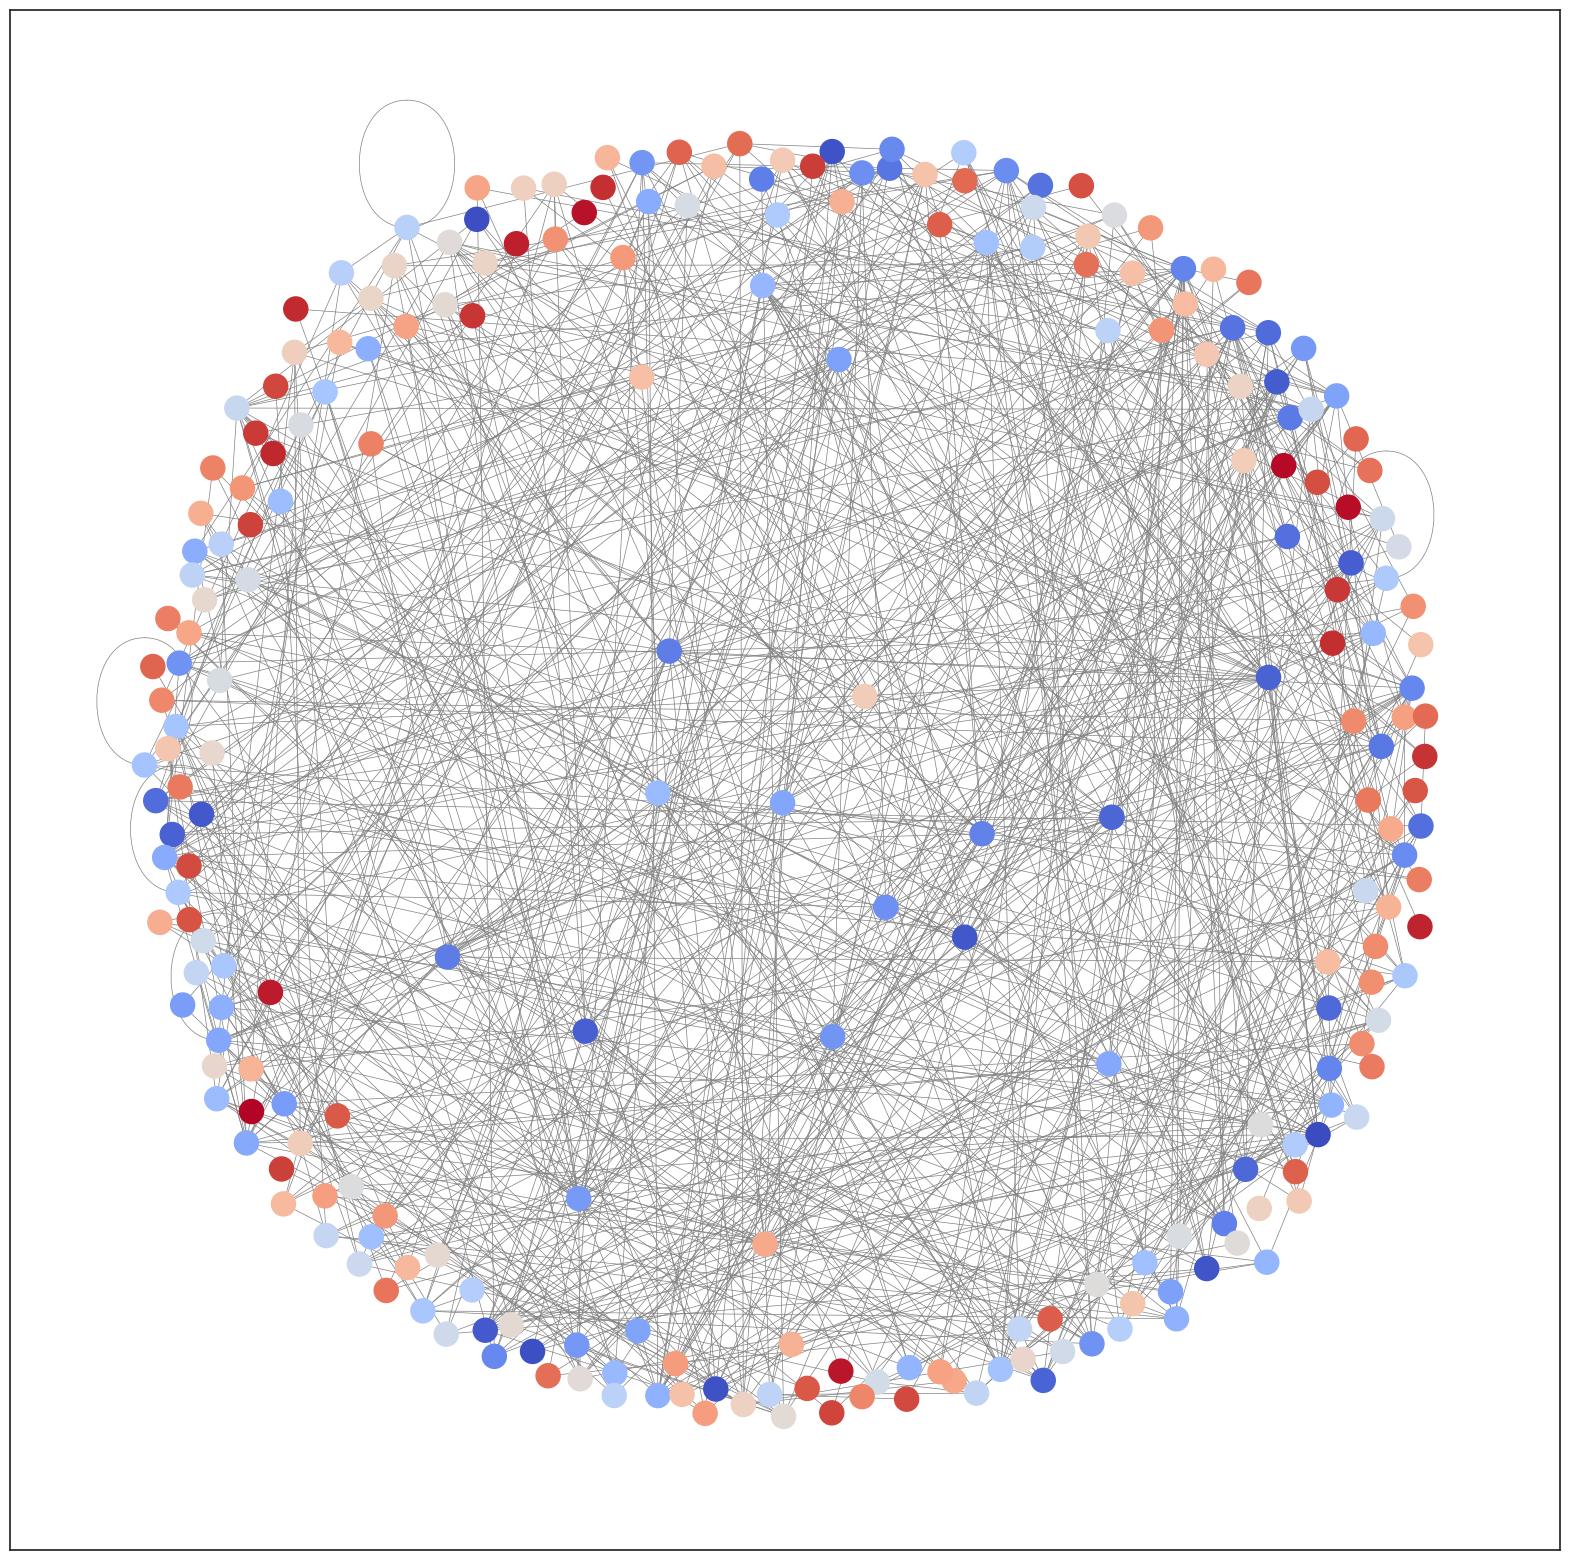

In [62]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

G.add_edges_from(res_edges)  # using a list of edge tuples

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

pos = nx.spring_layout(G, k=2)

fig, ax = plt.subplots(figsize=(20, 20))

nx.draw_networkx(G, pos = pos,
                 font_size=15,
                 width=0.5,
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],  
                 with_labels = False,
                 ax=ax)

plt.axis('equal') 
plt.show()

With each topic now perhaps

In [63]:
df2.Topic.value_counts()

-1    114
 2     66
 0     59
 3     23
 4     12
 1      8
Name: Topic, dtype: int64

Let's check with topic number 2 first.

In [304]:
df2_top2 = df2[df2['Topic Name'] == 'Linguistics in social media']
df2_top2 = pd.merge(df2_top2, df_edgelist, how='left', on='index')#.drop(columns='conn_idx_y').rename(columns={'conn_idx_x': 'conn_idx'})
df2_top2 = df2_top2.drop_duplicates(subset='index', keep='first') # in case any duplicates form

In [305]:
# Now make a list of the tuples

# First remove NoneType values
exploded_pairs_2 = df2_top2[df2_top2.conn_idx.astype(bool)]

# Then explode them
exploded_pairs_2 = exploded_pairs_2['paired_tuples'].explode()

# A list of all the tuples
list_egdes_2 = exploded_pairs_2.to_list()

# Removing None values from the list
res_edges_2 = []
for val in list_egdes_2:
    if val != None :
        res_edges_2.append(val)

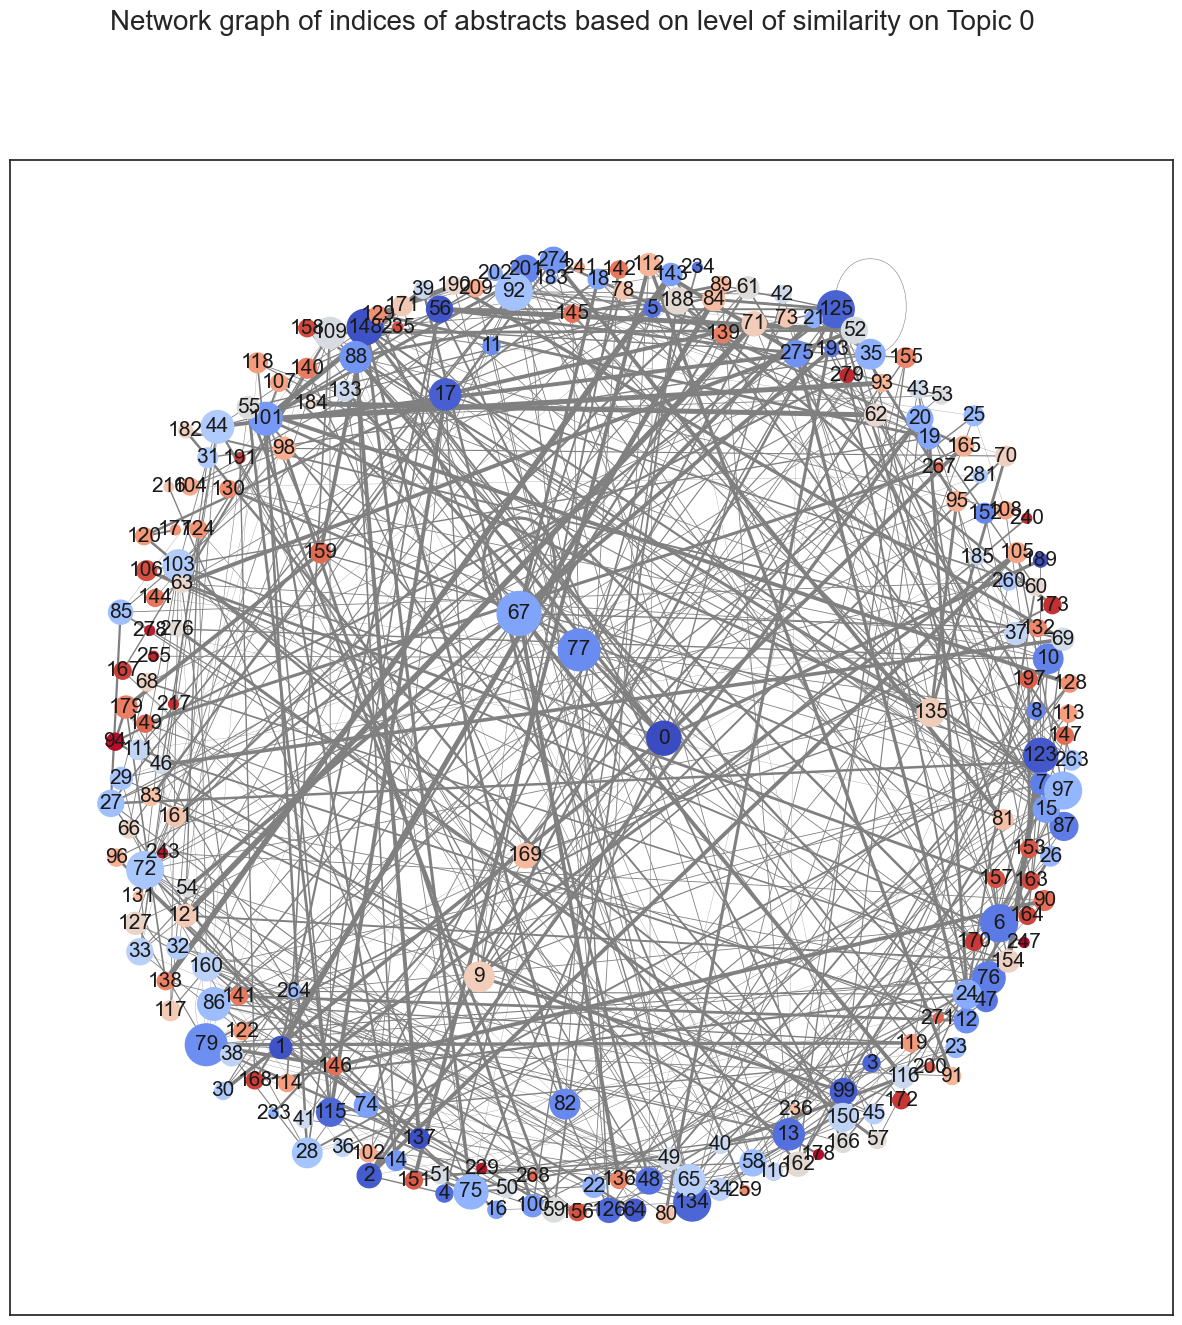

In [307]:
G = nx.Graph() 
G.add_edges_from(res_edges_2)  # using a list of edge tuples

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}
degree = dict(G.degree)

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

pos = nx.spring_layout(G, k=2)

fig, ax = plt.subplots(figsize=(15, 15))

nx.draw_networkx(G, pos = pos,
                 font_size=15,
                 width=[v * 0.2 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],  
                 node_size=[v * 50 for v in degree.values()],
                 with_labels = True,
                 ax=ax)
fig.suptitle('Network graph of indices of abstracts based on level of similarity on Topic 0', fontsize=20)
plt.axis('equal') 
plt.show()

For topic 1

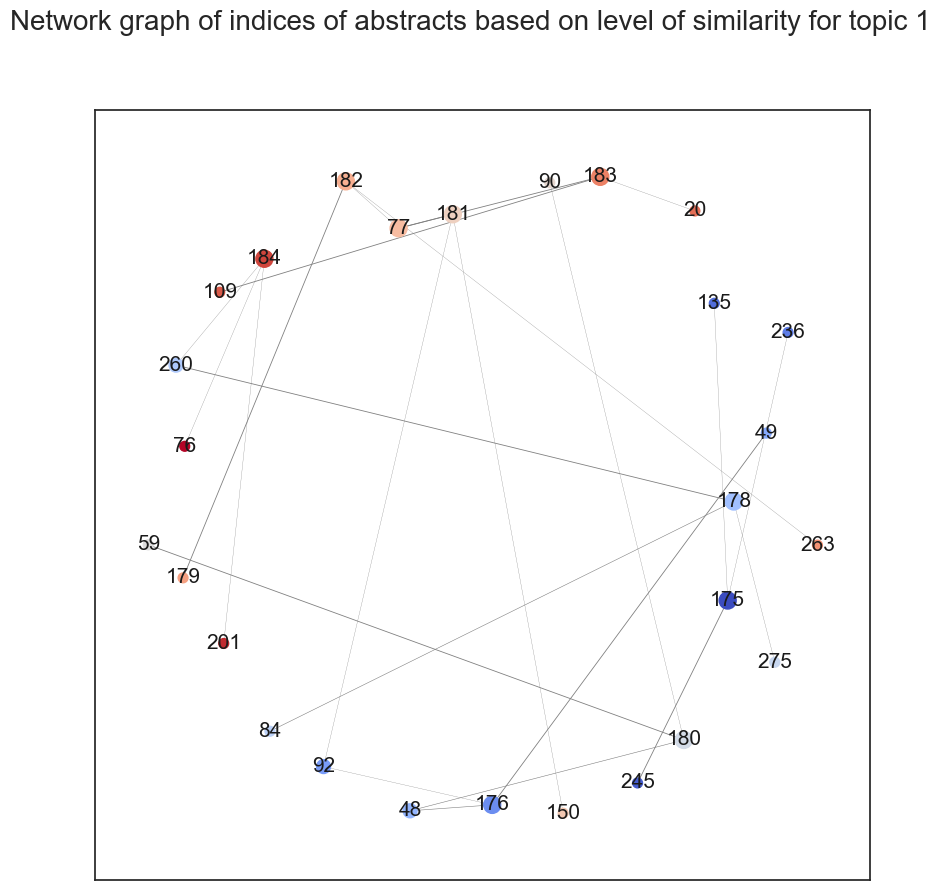

In [301]:
df2_top1 = df2[df2['Topic Name'] == 'Feminism/Feminist theories']
df2_top1 = pd.merge(df2_top1, df_edgelist, how='left', on='index')#.drop(columns='conn_idx_y').rename(columns={'conn_idx_x': 'conn_idx'})
df2_top1 = df2_top1.drop_duplicates(subset='index', keep='first')

exploded_pairs_3 = df2_top1[df2_top1.conn_idx.astype(bool)]

# Then explode them
exploded_pairs_3 = exploded_pairs_3['paired_tuples'].explode()

# A list of all the tuples
list_egdes_3 = exploded_pairs_3.to_list()

# Removing None values from the list
res_edges_3 = []
for val in list_egdes_3:
    if val != None :
        res_edges_3.append(val)

G = nx.Graph() 
G.add_edges_from(res_edges_3)  # using a list of edge tuples

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}
degree = dict(G.degree)

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

pos = nx.spring_layout(G, k=2)

fig, ax = plt.subplots(figsize=(10, 10))

nx.draw_networkx(G, pos = pos,
                 font_size=15,
                 width=[v * 0.2 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],  
                 node_size=[v * 50 for v in degree.values()],
                 with_labels = True,
                 ax=ax)
fig.suptitle('Network graph of indices of abstracts based on level of similarity for topic 1', fontsize=20)
plt.axis('equal') 
plt.show()

In [293]:
# View the manuscripts which has a lot of links to other manuscripts based on similarity index
df2_top2.loc[df2_top2['index'].isin([103, 130, 44, 167, 111])]

Authors  \
81                                 Marcé S., Poliak A.   
179               Fahim M., Gokhale S.S., Gokhale S.S.   
191  Fersini E., Rosato L., Candelieri A., Archetti...   
221                              Godoy D., Tommasel A.   
257  Plaza-Del-Arco F.M., Molina-González M.D., Mar...   

                                          Author(s) ID  \
81                            57880314500;57194687319;   
179                 57532597400;7102468162;7102468162;   
191  14045129300;57216524533;25824721500;6602395943...   
221                            8685199300;56341290400;   
257    57191078469;57204699220;35088446700;8865743500;   

                                                 Title  Year  \
81   On Gender Biases in Offensive Language Classif...  2022   
179  Detecting Offensive Content on Twitter during ...  2021   
191  Deep learning representations in automatic mis...  2021   
221  Is my model biased? Exploring unintended bias ...  2021   
257  SINAI at SemEval-2019 task 5: Ensemble learnin...  2019   

                                          Source title Volume Issue Art. No.  \
81   GeBNLP 2022 - 4th Workshop on Gender Bias in N...    NaN   NaN      NaN   
179  Proceedings - 20th IEEE International Conferen...    NaN   NaN      NaN   
191                          CEUR Workshop Proceedings   3033   NaN      NaN   
221                          CEUR Workshop Proceedings   2942   NaN      NaN   
257  NAACL HLT 2019 - International Workshop on Sem...    NaN   NaN      NaN   

    Page start Page end  ...  Publication Stage  Open Access  Source  \
81       174.0    183.0  ...              Final          NaN  Scopus   
179     1582.0   1587.0  ...              Final          NaN  Scopus   
191        NaN      NaN  ...              Final          NaN  Scopus   
221       97.0    111.0  ...              Final          NaN  Scopus   
257      476.0    479.0  ...              Final          NaN  Scopus   

           Discipline index  \
81   Computer Science    44   
179  Computer Science   103   
191  Computer Science   111   
221  Computer Science   130   
257  Computer Science   167   

                                      Title & Abstract  \
81   On Gender Biases in Offensive Language Classif...   
179  Detecting Offensive Content on Twitter during ...   
191  Deep learning representations in automatic mis...   
221  Is my model biased? Exploring unintended bias ...   
257  SINAI at SemEval-2019 task 5: Ensemble learnin...   

                      Topic Name                     class_list  \
81   Linguistics in social media  [ComputerScience, Psychology]   
179  Linguistics in social media  [ComputerScience, Psychology]   
191  Linguistics in social media  [ComputerScience, Psychology]   
221  Linguistics in social media  [ComputerScience, Psychology]   
257  Linguistics in social media  [ComputerScience, Psychology]   

           conn_idx                        paired_tuples  
81   [275, 134, 64]     [(44, 275), (44, 134), (44, 64)]  
179     [72, 99, 0]     [(103, 72), (103, 99), (103, 0)]  
191   [12, 92, 188]   [(111, 12), (111, 92), (111, 188)]  
221    [10, 67, 97]    [(130, 10), (130, 67), (130, 97)]  
257  [140, 82, 134]  [(167, 140), (167, 82), (167, 134)]  

[5 rows x 39 columns]

In [294]:
n = G.number_of_nodes()
m = G.number_of_edges()
n, m

(216, 517)

In [68]:
df2_top2 = df2_top2[['index', 'Abstract']]
df2_top2 = df2_top2.drop_duplicates(keep='first')

In [69]:
abstracts = dict()

for (idx, abs) in df2_top2[['index', 'Abstract']].values:
    node = idx
    abstract = abs
    abstracts[int(node)] = abstract

abstracts

{28: "As a unique type of social network, the online gaming industry is a fast-growing, changing, and men-dominated field which attracts diverse backgrounds. Being dominated by male users, game developers, game players, game investors, the non-inclusiveness and gender inequality reside as salient problems in the community. In the online gaming communities, most women players report toxic and offensive language or experiences of verbal abuse. Symbolic interactionists and feminists assume that words matter since the use of particular language and terms can dehumanize and harm particular groups such as women. Identifying and reporting the toxic behavior, sexism, and harassment that occur in online games is a critical need in preventing cyberbullying, and it will help gender diversity and equality grow in the online gaming industry. However, the research on this topic is still rare, except for some milestone studies. This paper aims to contribute to the theory and practice of sexist toxic 

In [70]:
nodes = list(G.nodes())
nodes

[28,
 101,
 6,
 123,
 100,
 5,
 14,
 29,
 72,
 260,
 281,
 99,
 218,
 32,
 65,
 45,
 88,
 37,
 111,
 110,
 185,
 39,
 44,
 48,
 136,
 134,
 160,
 40,
 116,
 103,
 133,
 201,
 82,
 43,
 13,
 87,
 21,
 275,
 64,
 237,
 279,
 255,
 67,
 49,
 79,
 115,
 236,
 265,
 51,
 58,
 187,
 143,
 112,
 52,
 92,
 56,
 109,
 135,
 96,
 54,
 59,
 276,
 211,
 55,
 61,
 142,
 84,
 10,
 118,
 233,
 272,
 166,
 274,
 26,
 57,
 97,
 0,
 178,
 23,
 77,
 34,
 33,
 1,
 162,
 188,
 60,
 24,
 17,
 20,
 15,
 63,
 66,
 62,
 224,
 91,
 148,
 264,
 80,
 93,
 104,
 241,
 12,
 234,
 259,
 113,
 163,
 194,
 271,
 114,
 105,
 75,
 117,
 221,
 120,
 177,
 169,
 126,
 122,
 76,
 129,
 19,
 190,
 130,
 147,
 263,
 167,
 140,
 170,
 176,
 184]

In [100]:
keybert_model = KeyBERTInspired(top_n_words=20)
mmr_model = MaximalMarginalRelevance(diversity=0.2)
pos_patterns = [
            [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
            [{'POS': 'NOUN'}], [{'POS': 'ADJ'}]
]
pos_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns) 

representation_models = [pos_model, keybert_model, mmr_model]

topic_model_comp = BERTopic(representation_model=representation_models,
             language='multilingual',
             nr_topics="auto",
    low_memory=False,
    calculate_probabilities=True,
    top_n_words=10,
    n_gram_range=(1, 3),
)
topic_model_rest = BERTopic(representation_model=representation_models,
             language='multilingual',
             nr_topics="auto",
    low_memory=False,
    calculate_probabilities=True,
    top_n_words=10,
    n_gram_range=(1, 3),
)

### Computer Science vs Rest

In [108]:
df_comp = pd.concat([df_cs, df_engg])
df_comp['Abstract'] = df_comp['Abstract'].apply(substring_before_chars)
topics_comp, probs_comp = topic_model_comp.fit_transform(df_comp['Abstract'].to_list())
info_comp = topic_model_comp.get_topic_info()
info_comp

Topic  Count                                               Name
0     -1     36  -1_social media_on social media_on social_hara...
1      0    105  0_hate speech detection_of hate speech_hate sp...
2      1     52  1_sexism identification_the sexism_of sexism_s...
3      2     28  2_automatic misogyny identification_misogyny i...

In [111]:
topic_labels_comp = {-1: 'Outliers', 0: 'Hate speech', 1: 'Sexism', 2: 'Misogyny'}
topic_model_comp.set_topic_labels(topic_labels_comp)

In [103]:
df_rest = pd.concat([df_soc, df_psy, df_ah])
df_rest['Abstract'] = df_rest['Abstract'].apply(substring_before_chars)
topics_rest, probs_rest = topic_model_rest.fit_transform(df_rest['Abstract'].to_list())
info_rest = topic_model_rest.get_topic_info()
info_rest

Topic  Count                                               Name
0     -1     95              -1_sexism_feminist_stereotypes_gender
1      0     31  0_abusive language_offensive language_toxic co...
2      1     22  1_gender dysphoria_gender and_and gender_feminist
3      2     19  2_hate speech and_hate speech in_hate speech_h...
4      3     16  3_sexist attitudes_desire in women_objectifica...
5      4     11  4_gender stereotype detection_gender stereotyp...
6      5     11  5_misogyny and_misogyny_online misogyny_misogy...

In [104]:
topic_model_rest.generate_topic_labels()

['-1_sexism_feminist_stereotypes',
 '0_abusive language_offensive language_toxic comments',
 '1_gender dysphoria_gender and_and gender',
 '2_hate speech and_hate speech in_hate speech',
 '3_sexist attitudes_desire in women_objectification of women',
 '4_gender stereotype detection_gender stereotype_social sexual behavior',
 '5_misogyny and_misogyny_online misogyny']

In [113]:
topic_labels_rest = {-1: 'Outliers', 0: 'Abusive language in Linguistics', 1: 'Feminism/Feminist theories', 2: 'Hate Speech', 3: 'Sexism', 4:'Gender stereotypes', 5: 'Misogyny'}
topic_model_rest.set_topic_labels(topic_labels_rest)

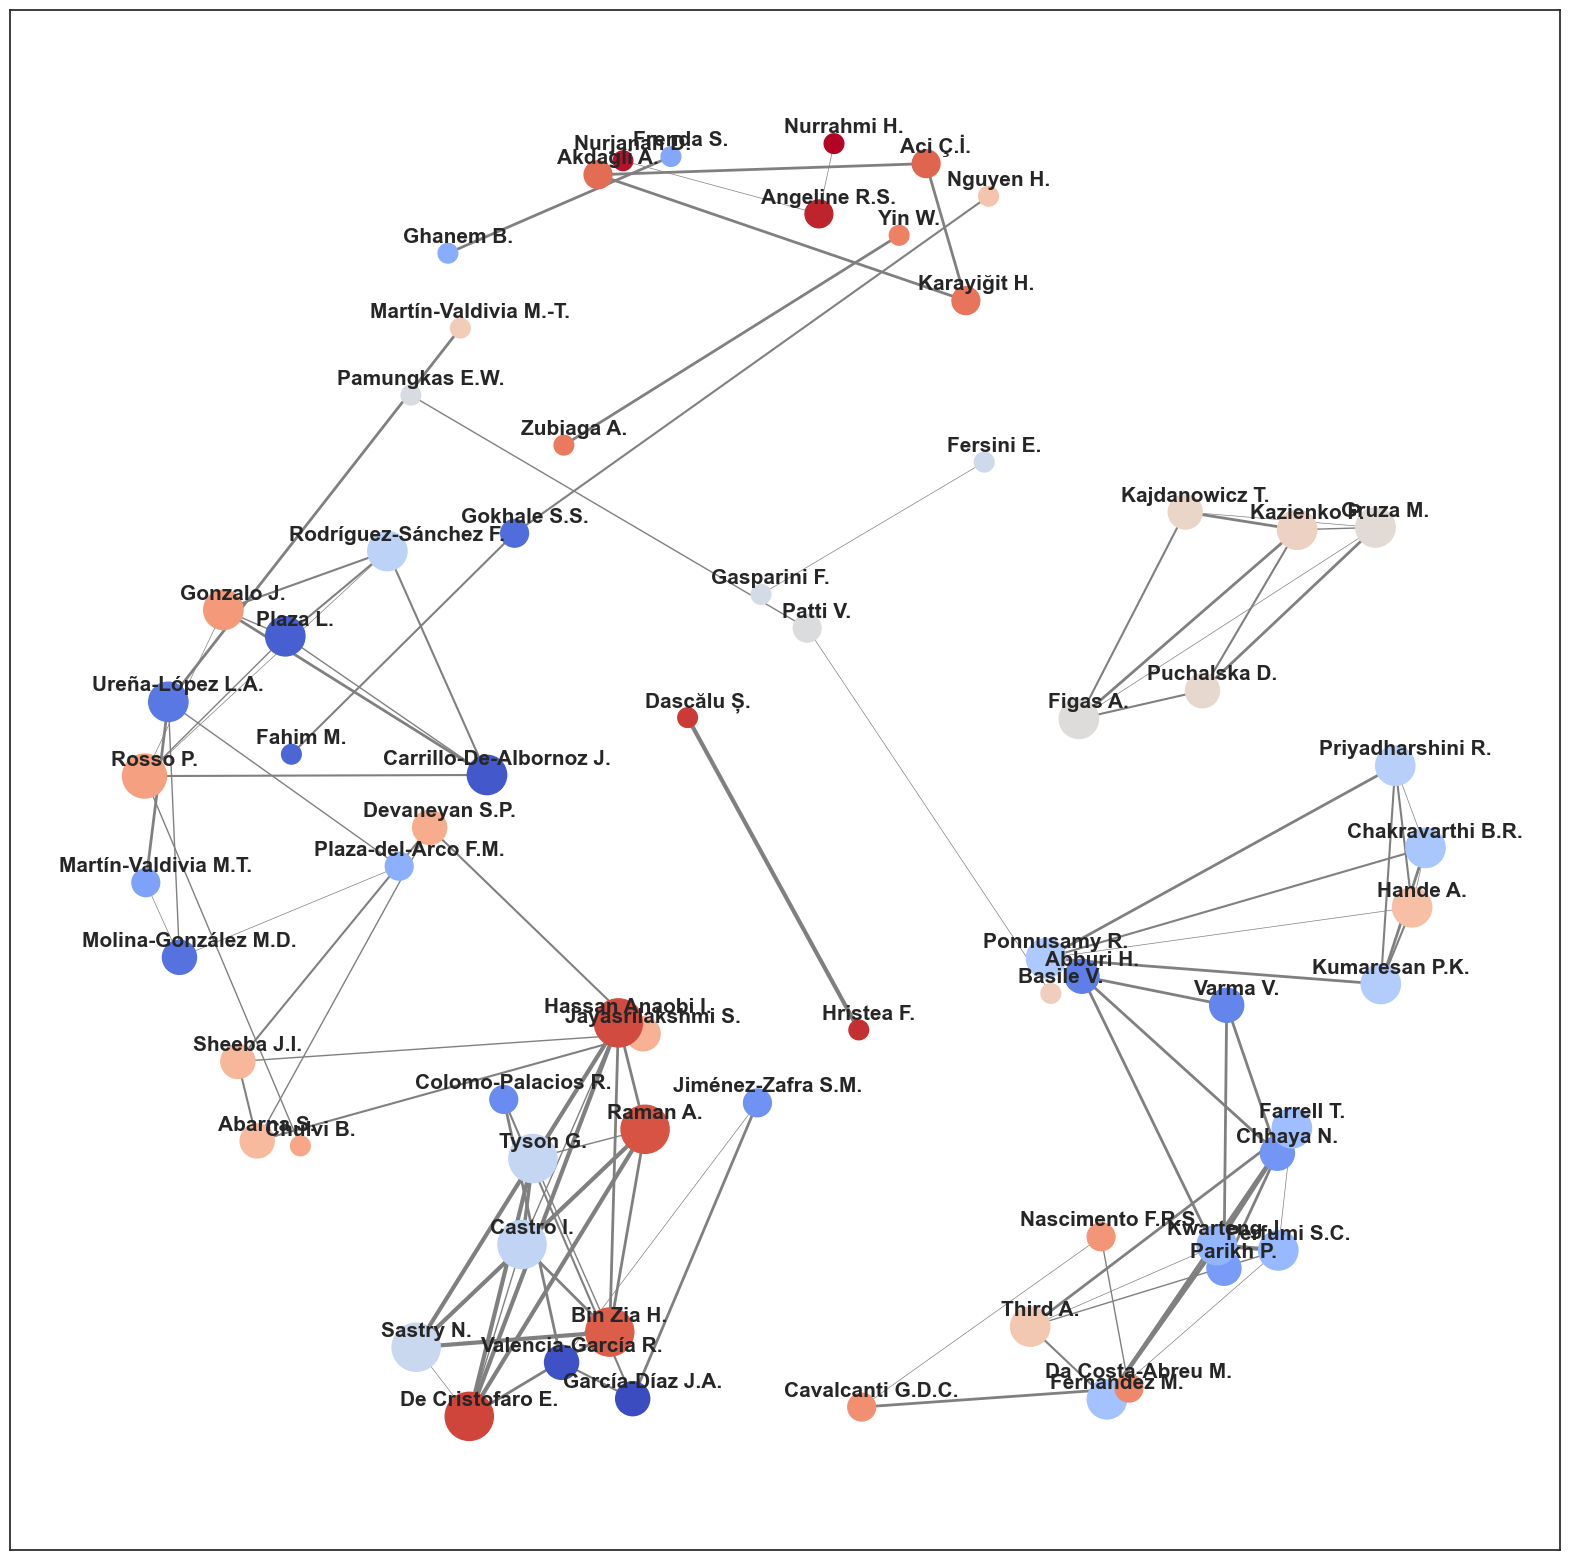

In [74]:
df_comp['paired_authors'] = df_comp['Authors'].apply(auth_comb)

df_comp_auth_term_bigram= df_comp['paired_authors']
df_comp_auth_term_bigram = list(chain.from_iterable(df_comp_auth_term_bigram))

# Create counter of words in clean bigrams
sexism_comp_auth_bigram_counts = collections.Counter(df_comp_auth_term_bigram)

sexism_comp_auth_bigram_counts= sexism_comp_auth_bigram_counts.most_common(100)

sexism_comp_auth_bigram_counts = pd.DataFrame(sexism_comp_auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

d = sexism_comp_auth_bigram_counts.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)
    
    
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width= [v * 0.5 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 200 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.show()

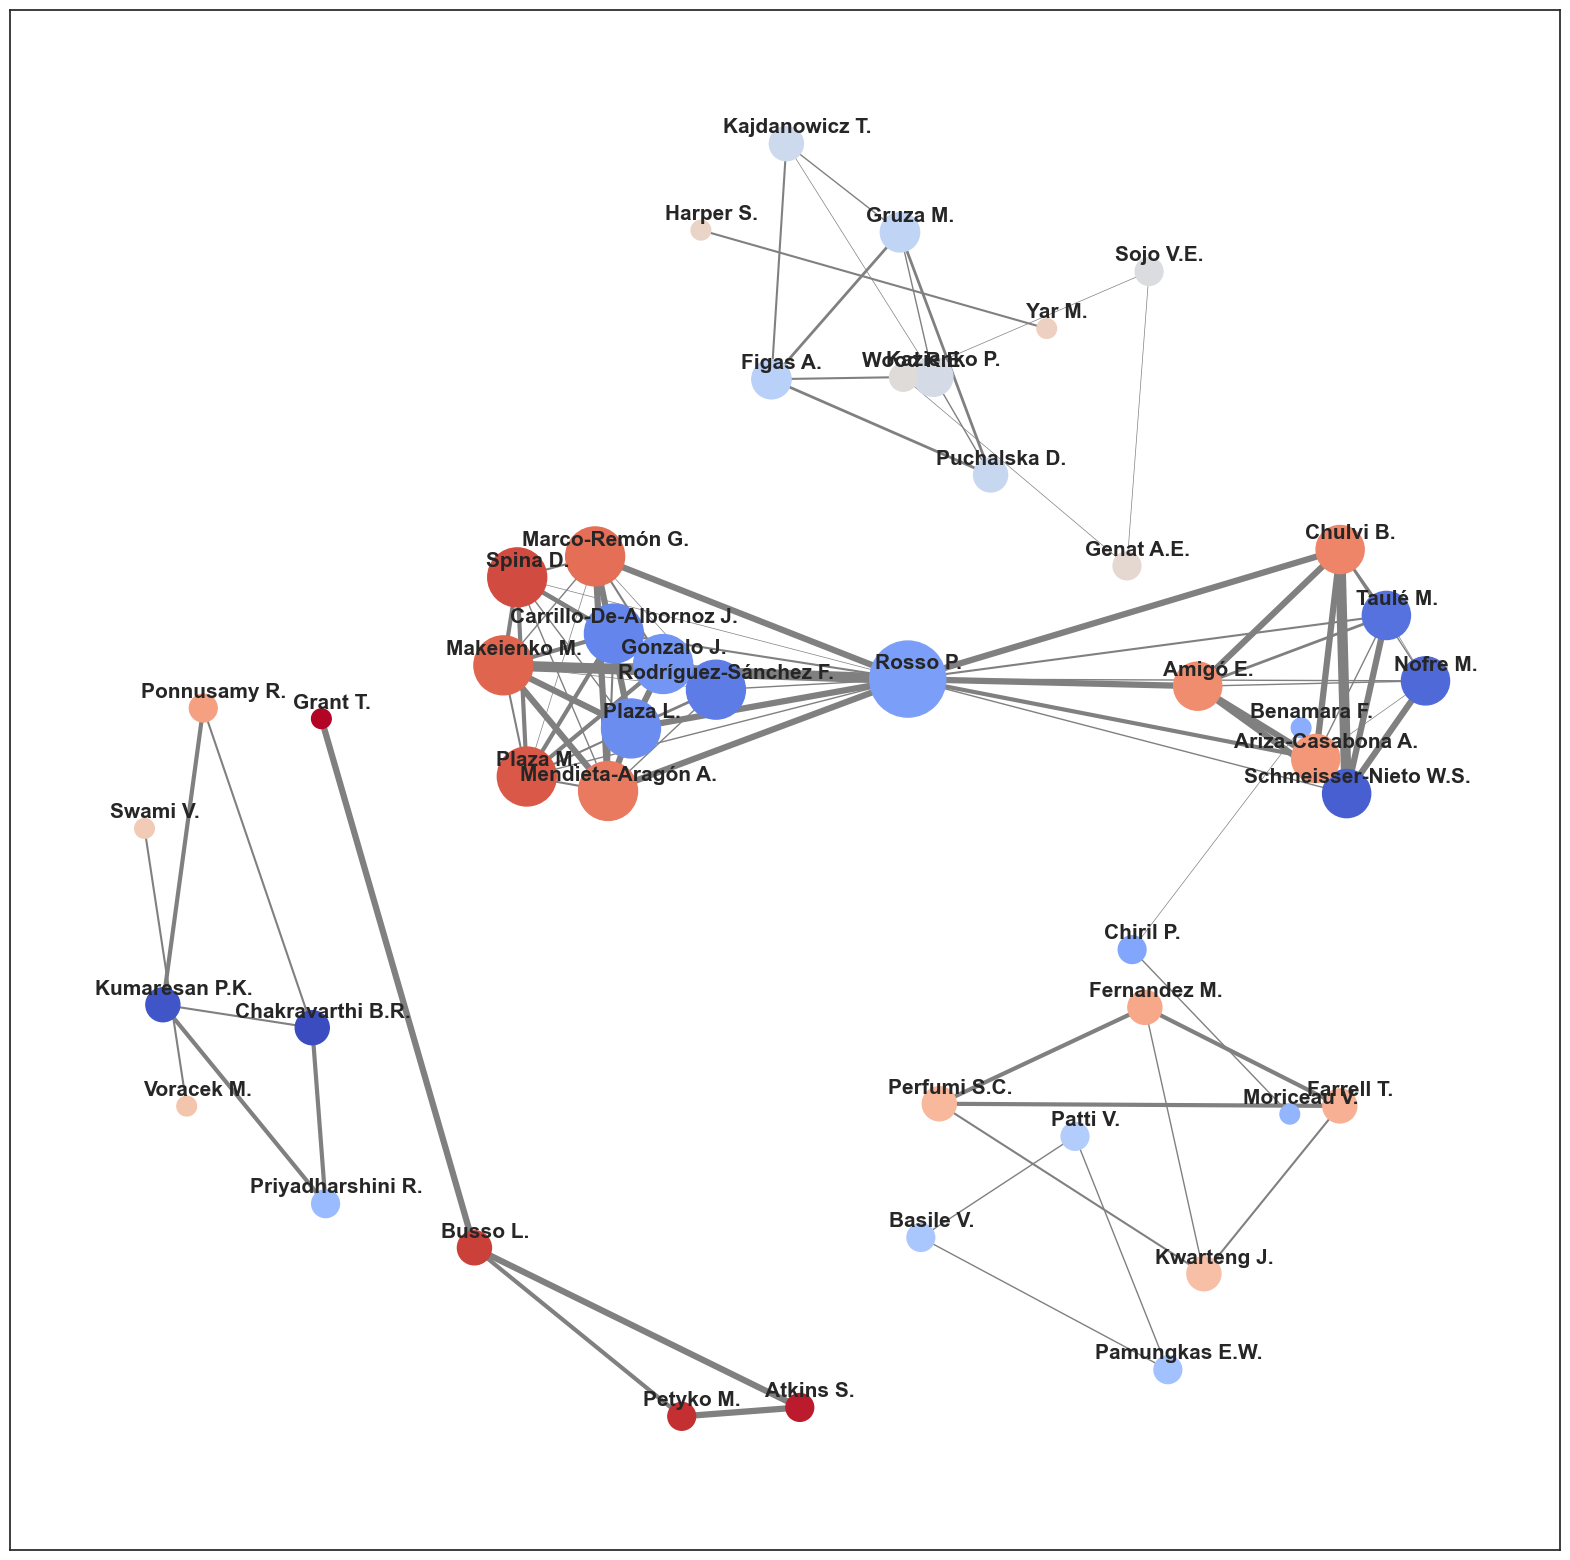

In [75]:
df_rest['paired_authors'] = df_rest['Authors'].apply(auth_comb)

df_rest_auth_term_bigram= df_rest['paired_authors']
df_rest_auth_term_bigram = list(chain.from_iterable(df_rest_auth_term_bigram))

# Create counter of words in clean bigrams
sexism_rest_auth_bigram_counts = collections.Counter(df_rest_auth_term_bigram)

sexism_rest_auth_bigram_counts= sexism_rest_auth_bigram_counts.most_common(100)

sexism_rest_auth_bigram_counts = pd.DataFrame(sexism_rest_auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

d = sexism_rest_auth_bigram_counts.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)
    
    
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width= [v * 0.5 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 200 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.show()

In [115]:
get_document_info_comp = topic_model_comp.get_document_info(df_comp['Abstract'].tolist())
get_document_info_comp

Document  Topic  \
0    The analysis and detection of offensive conten...      0   
1    “Misogynoir” is a term that refers to the anti...      2   
2    Proud Boys, a contemporary radical extremist g...      0   
3    Growing evidence suggests that YouTube's recom...      0   
4    Homophobia or Transphobia can be defined as th...     -1   
..                                                 ...    ...   
216  The use of inclusive language, among many othe...      2   
217  During the last decade, hateful and sexist con...      1   
218  Recent moves to consider misogyny as a hate cr...     -1   
219  Patriarchal behavior, such as other social hab...      1   
220  Snapchat. WhatsApp. Ashley Madison. Fitbit. Ti...      0   

                                                  Name   CustomName  \
0    0_hate speech detection_of hate speech_hate sp...  Hate speech   
1    2_automatic misogyny identification_misogyny i...     Misogyny   
2    0_hate speech detection_of hate speech_hate sp...  Hate speech   
3    0_hate speech detection_of hate speech_hate sp...  Hate speech   
4    -1_social media_on social media_on social_hara...     Outliers   
..                                                 ...          ...   
216  2_automatic misogyny identification_misogyny i...     Misogyny   
217  1_sexism identification_the sexism_of sexism_s...       Sexism   
218  -1_social media_on social media_on social_hara...     Outliers   
219  1_sexism identification_the sexism_of sexism_s...       Sexism   
220  0_hate speech detection_of hate speech_hate sp...  Hate speech   

                                           Top_n_words  Probability  \
0    hate speech detection - of hate speech - hate ...     1.000000   
1    automatic misogyny identification - misogyny i...     0.244562   
2    hate speech detection - of hate speech - hate ...     0.510793   
3    hate speech detection - of hate speech - hate ...     0.766559   
4    social media - on social media - on social - h...     0.533444   
..                                                 ...          ...   
216  automatic misogyny identification - misogyny i...     0.273404   
217  sexism identification - the sexism - of sexism...     1.000000   
218  social media - on social media - on social - h...     0.341346   
219  sexism identification - the sexism - of sexism...     1.000000   
220  hate speech detection - of hate speech - hate ...     0.470435   

     Representative_document  
0                      False  
1                       True  
2                      False  
3                      False  
4                      False  
..                       ...  
216                    False  
217                    False  
218                    False  
219                    False  
220                    False  

[221 rows x 7 columns]

In [116]:
get_document_info_rest = topic_model_rest.get_document_info(df_rest['Abstract'].tolist())
get_document_info_rest

Document  Topic  \
0    “Misogynoir” is a term that refers to the anti...      5   
1    Proud Boys, a contemporary radical extremist g...     -1   
2    Growing evidence suggests that YouTube's recom...     -1   
3    Homophobia or Transphobia can be defined as th...     -1   
4    Game developers, researchers, and players reco...      0   
..                                                 ...    ...   
200  This volume unites research on the problem of ...      1   
201  Alternative (or "underground") rap music prove...     -1   
202  Contemporary theorists use the term "social co...     -1   
203  It has been noted by numerous commentators tha...     -1   
204                                                        -1   

                                                  Name  \
0    5_misogyny and_misogyny_online misogyny_misogy...   
1                -1_sexism_feminist_stereotypes_gender   
2                -1_sexism_feminist_stereotypes_gender   
3                -1_sexism_feminist_stereotypes_gender   
4    0_abusive language_offensive language_toxic co...   
..                                                 ...   
200  1_gender dysphoria_gender and_and gender_feminist   
201              -1_sexism_feminist_stereotypes_gender   
202              -1_sexism_feminist_stereotypes_gender   
203              -1_sexism_feminist_stereotypes_gender   
204              -1_sexism_feminist_stereotypes_gender   

                          CustomName  \
0                           Misogyny   
1                           Outliers   
2                           Outliers   
3                           Outliers   
4    Abusive language in Linguistics   
..                               ...   
200       Feminism/Feminist theories   
201                         Outliers   
202                         Outliers   
203                         Outliers   
204                         Outliers   

                                           Top_n_words  Probability  \
0    misogyny and - misogyny - online misogyny - mi...     1.000000   
1    sexism - feminist - stereotypes - gender - wom...     0.839299   
2    sexism - feminist - stereotypes - gender - wom...     0.058757   
3    sexism - feminist - stereotypes - gender - wom...     0.029952   
4    abusive language - offensive language - toxic ...     0.657235   
..                                                 ...          ...   
200  gender dysphoria - gender and - and gender - f...     1.000000   
201  sexism - feminist - stereotypes - gender - wom...     0.434853   
202  sexism - feminist - stereotypes - gender - wom...     0.152915   
203  sexism - feminist - stereotypes - gender - wom...     0.395138   
204  sexism - feminist - stereotypes - gender - wom...     0.836953   

     Representative_document  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  
..                       ...  
200                    False  
201                    False  
202                    False  
203                     True  
204                    False  

[205 rows x 7 columns]

In [112]:
topic_model_comp.visualize_documents(df_comp['Abstract'].to_list(), custom_labels=True, width=850, height=500)

In [114]:
topic_model_rest.visualize_documents(df_rest['Abstract'].to_list(), custom_labels=True, width=850, height=500)

In [120]:
topic_model_comp.visualize_barchart(topics=None, top_n_topics=5, n_words=10, custom_labels=True, width=400, height=350)

In [123]:
topic_model_rest.visualize_barchart(topics=None, top_n_topics=5, n_words=10, custom_labels=True, width=350, height=350)

TypeError: unhashable type: 'Figure'

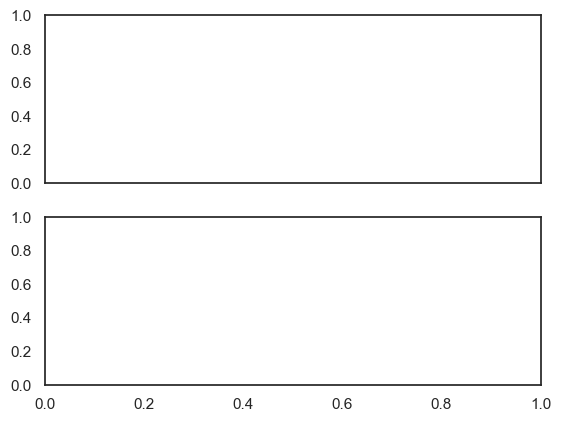

In [126]:
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].plot(topic_model_comp.visualize_documents(df_comp['Abstract'].to_list(), custom_labels=True))
ax[1].plot(topic_model_rest.visualize_documents(df_rest['Abstract'].to_list(), custom_labels=True))
plt.show()


In [30]:
# Create representation models
keybert_model = KeyBERTInspired(top_n_words=30)
mmr_model = MaximalMarginalRelevance(diversity=0.2)
pos_patterns = [
            [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
            [{'POS': 'NOUN'}], [{'POS': 'ADJ'}]
]
pos_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns) 

representation_models = [pos_model, keybert_model, mmr_model]
ft = api.load('fasttext-wiki-news-subwords-300')
embedding_model = SentenceTransformer("distilbert-base-nli-mean-tokens")   #"all-MiniLM-L6-v2", "xlm-r-bert-base-nli-stsb-mean-tokens"
word_doc_embedder = WordDocEmbedder(embedding_model=embedding_model, word_embedding_model=ft)
umap_model = umap.UMAP(n_neighbors=200, n_components=5, min_dist=0.0, metric='cosine', random_state=123)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words="english")
ctfidf_model = ClassTfidfTransformer() # reduce_frequent_words=True

topic_model_unsup = BERTopic(
    language='multilingual', # Set to 'multilingual' for datasets with languages other than English. # a few other languages set so changing from 'english'
    top_n_words=10,
    n_gram_range=(1, 3),
    min_topic_size=5,
    nr_topics= None, #"auto"
    low_memory=False,
    calculate_probabilities=True, # The probabilities of all topics per document.
    embedding_model=word_doc_embedder,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    #diversity=0.0,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    verbose=False,
    representation_model=representation_models
)

topics_unsup, probs_unsup = topic_model_unsup.fit_transform(df2['Abstract'].to_list())

In [31]:
topic_model_unsup.get_topic_info()

Topic  Count                                             Name
0     -1     52         -1_sexism_sexist_misogynous_misogynistic
1      0    177                   0_sexism_sexist_abusive_online
2      1     36               1_competition_spanish_sexist_final
3      2      7                 2_ones_consider_depicted_context
4      3      5      3_learning_computational_training_efficient
5      4      5  4_abuse_methodologies_revolutionized_linguistic